# Introduction to Statistics
## 1.5 Descriptive Statistics
### 1.5.1. Discrete Distributions: Frequencies and Contingency Tables

Throughout these lessons, we will import data from the wooldridge library. This data is used in the textbook _Introduction to Econometrics: A Modern Approach_ by Jeffrey M. Wooldridge. The imported data is contained in a pandas dataframe, so we will need to get familiar wih commands from the _pandas_ module in python.

First we will import the dataset, _"affairs"_, and we will set the index as the id of each respondent. 

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd

affairs = woo.dataWoo("affairs")
affairs.set_index("id", inplace = True)

Let's take a look at some representative aggregates using the _.median()_, _.mean()_, and _.describe()_ methods.

In [2]:
affairs.median()

male         0.0
age         32.0
yrsmarr      7.0
kids         1.0
relig        3.0
educ        16.0
occup        5.0
ratemarr     4.0
naffairs     0.0
affair       0.0
vryhap       0.0
hapavg       0.0
avgmarr      0.0
unhap        0.0
vryrel       0.0
smerel       0.0
slghtrel     0.0
notrel       0.0
dtype: float64

In [3]:
affairs.mean()

male         0.475874
age         32.487521
yrsmarr      8.177696
kids         0.715474
relig        3.116473
educ        16.166389
occup        4.194676
ratemarr     3.931780
naffairs     1.455907
affair       0.249584
vryhap       0.386023
hapavg       0.322795
avgmarr      0.154742
unhap        0.109817
vryrel       0.116473
smerel       0.316140
slghtrel     0.214642
notrel       0.272879
dtype: float64

When using _.describe_, it will be easier to view the dataframe if we transpose the result using _.T_

In [4]:
affairs.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
male,601.0,0.48,0.50,0.00,0.0,0.0,1.0,1.0
age,601.0,32.49,9.29,17.50,27.0,32.0,37.0,57.0
yrsmarr,601.0,8.18,5.57,0.12,4.0,7.0,15.0,15.0
kids,601.0,0.72,0.45,0.00,0.0,1.0,1.0,1.0
relig,601.0,3.12,1.17,1.00,2.0,3.0,4.0,5.0
educ,601.0,16.17,2.40,9.00,14.0,16.0,18.0,20.0
occup,601.0,4.19,1.82,1.00,3.0,5.0,6.0,7.0
ratemarr,601.0,3.93,1.10,1.00,3.0,4.0,5.0,5.0
naffairs,601.0,1.46,3.30,0.00,0.0,0.0,0.0,12.0
affair,601.0,0.25,0.43,0.00,0.0,0.0,0.0,1.0


First, we are going to adjust the codings of _"ratemarriage"_ to start from 0. This will allow the numerical rating to correspond with the index of string labels that we will use in the following step.

In [5]:
# adjust codings to [0-4]
affairs["ratemarr"] = affairs["ratemarr"].sub(1)


Now let's transform the _"ratemarr"_ varriable into string descriptions. In this lesson we will learn multiple ways of transforming data from numeric data into categorical data. One way is to use *pd.Categorical.from_codes()*, which aligns numerical variables with string descriptors from the list passed to *categories*.

In [6]:
# describe "yes" "no" for categorical variables
mlab = ["very unhappy", "unhappy", "average", "happy", "very happy"]
affairs["marriage"] = pd.Categorical.from_codes(affairs["ratemarr"],
                                               categories = mlab)

We view the number of responses for each category using the *.count_values()* command.

In [7]:
affairs["marriage"].value_counts()

very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: marriage, dtype: int64

We can also calculate the percentage of respondents who selected each category by setting the _normalize_ option to _True_. 

Suppose that we called the happiness of a marriage "A", We can write these percentages formally as $P(A=a)$.

In [8]:
affairs["marriage"].value_counts(normalize = True).mul(100)

very happy      38.602329
happy           32.279534
average         15.474210
unhappy         10.981697
very unhappy     2.662230
Name: marriage, dtype: float64

Likewise, we can create the variable _"haskids"_ to consider whether or not a married couple has children. 

In [9]:
affairs["haskids"] = pd.Categorical.from_codes(affairs["kids"],
                                              categories=["no","yes"])

We can also calculate the percentages for this variable. We can write this as $P(B=b)$

In [10]:
affairs["haskids"].value_counts(normalize = True).mul(100)

yes    71.547421
no     28.452579
Name: haskids, dtype: float64

Finally, we can calculate joint probabilities $P(A=a,B=b)$ by calling both variables with this command. We see that most marriages include children and are either happy or very happy.

In [11]:
affairs[["marriage","haskids"]].value_counts(normalize = True).mul(100)

marriage      haskids
happy         yes        25.623960
very happy    yes        22.628952
              no         15.973378
average       yes        11.480865
unhappy       yes         9.650582
happy         no          6.655574
average       no          3.993344
very unhappy  yes         2.163062
unhappy       no          1.331115
very unhappy  no          0.499168
dtype: float64

If we include very happy in our definition of a happy marriage, the $P(A=Happy, B=Kids) = 48.25\%$. We can check this quickly using the *.sum()* method to check the the sum of the first two categories. We will call only the first two rows and call this method.

In [12]:
affairs[["marriage","haskids"]].value_counts(normalize = True).mul(100).iloc[:2].sum()

48.25291181364392

## Bayes Theorem

We can also calculate the probably of one outcome given another outcome. For example, what is the probability that given someone has children, do they think of themselves as being in a happy marriage?

In [13]:
affairs.groupby("haskids")["marriage"].value_counts()

haskids              
no       very happy       96
         happy            40
         average          24
         unhappy           8
         very unhappy      3
yes      happy           154
         very happy      136
         average          69
         unhappy          58
         very unhappy     13
Name: marriage, dtype: int64

Let's check the probability of a family having children and of having a happy marriage.

In [14]:
affairs["marriage"].value_counts(normalize=True).mul(100)

very happy      38.602329
happy           32.279534
average         15.474210
unhappy         10.981697
very unhappy     2.662230
Name: marriage, dtype: float64

The probability of having at least a happy marriage is the sum of the first two values. We see that:

$P(A \geq Happy)=70.88\%$

In [15]:
p_happy = affairs["marriage"].value_counts(normalize=True).mul(100)[["very happy", "happy"]].sum()
p_happy

70.88186356073211

We can plot these percentages using a pie chart. To include percentage labels we use the _autopct_ option.

Text(0.5, 1.0, 'Marriage Satisfaction')

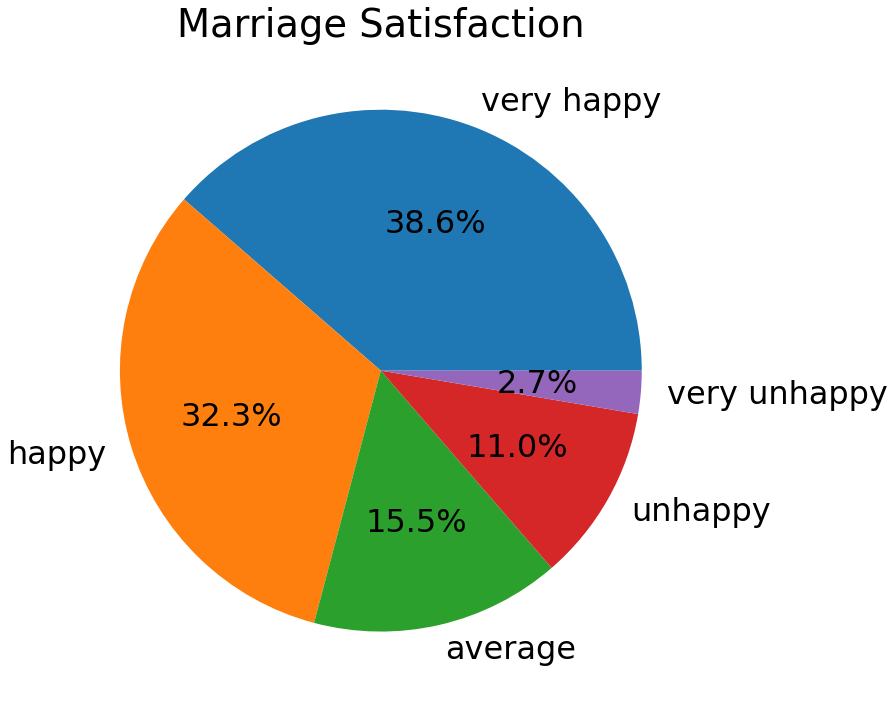

In [16]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (12,12))
# using normalize in .value_counts() normalizes all values percentages that sum to 100%.
affairs["marriage"].value_counts(normalize = True).mul(100).plot.pie(autopct='%1.1f%%', ax = ax)
# remove the default label on the y axis
ax.set_ylabel("")
ax.set_title("Marriage Satisfaction")

Likewise, we can define the probability that a family has children  as $P(B = Kids) \approx 71.55\%$

In [17]:
affairs["haskids"].value_counts(normalize=True).mul(100)

yes    71.547421
no     28.452579
Name: haskids, dtype: float64

In [18]:
p_children = affairs["haskids"].value_counts(normalize=True).mul(100)["yes"]
p_children

71.54742096505824

Text(0.5, 1.0, 'Married with Children')

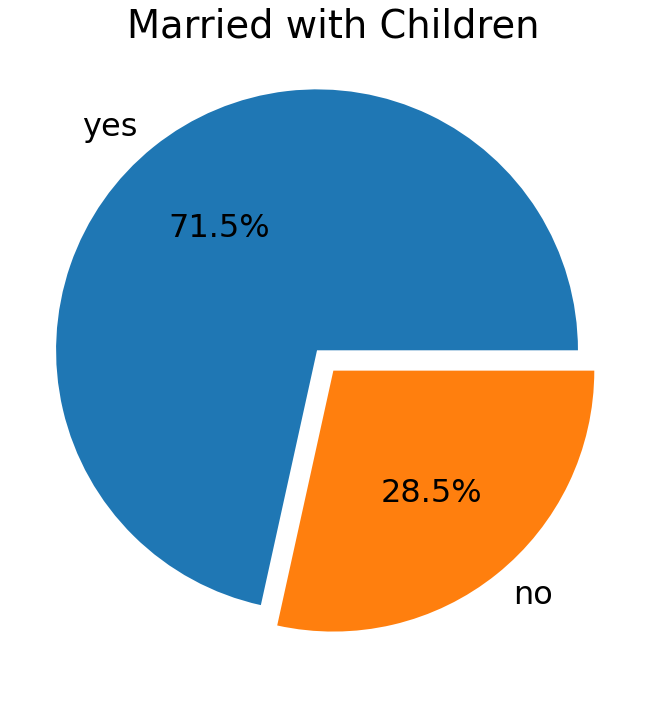

In [19]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (12,12))
# using normalize in .value_counts() normalizes all values percentages that sum to 100%.
affairs["haskids"].value_counts(normalize = True).mul(100).plot.pie(autopct='%1.1f%%', 
                                                                    explode = (.1,0),
                                                                    ax = ax)
# remove the default label on the y axis
ax.set_ylabel("")
ax.set_title("Married with Children")

Now let's check $P(A=a|B=b)$. Remember, $A$ is our _"marriage"_ variable and $B$  is our has _"haskids"_ variable. We can separate observations by the value of a categorical variables using the *.groupby(category)* to perform this partition. As with before, we can use the normalize command to calculate outcomes within the groupby variable by percentage.

In [20]:
# calculate percentages within each subset within groupby("haskids"), not overall
affairs.groupby("haskids")["marriage"].value_counts(normalize = True).mul(100)

haskids              
no       very happy      56.140351
         happy           23.391813
         average         14.035088
         unhappy          4.678363
         very unhappy     1.754386
yes      happy           35.813953
         very happy      31.627907
         average         16.046512
         unhappy         13.488372
         very unhappy     3.023256
Name: marriage, dtype: float64

Now sum the happiness variables for those without and those with children. We see that most marriages are happy marriages. Whether or not kids are present. Most indicate that their marriage is a happy marriage. Those married without kids report that they are on average, happy more often.

In [21]:
p_happy_given_no_kids = affairs.groupby("haskids")["marriage"].value_counts(normalize = True).mul(100).loc["no"][["very happy", "happy"]].sum().round(3)
"P(A=Happy|B=No Kids) = " + str(p_happy_given_no_kids) +"%"

'P(A=Happy|B=No Kids) = 79.532%'

In [22]:
p_happy_given_kids = affairs.groupby("haskids")["marriage"].value_counts(normalize = True).mul(100).loc["yes"][["very happy", "happy"]].sum().round(3)
"P(A=Happy|B=Kids) = " + str(p_happy_given_kids)+"%"

'P(A=Happy|B=Kids) = 67.442%'

These results are implied in our pie charts of marriage satisfaction. (Sum the values for happy and very happy!)

Text(0.5, 0.98, 'Marriage Satisfaction')

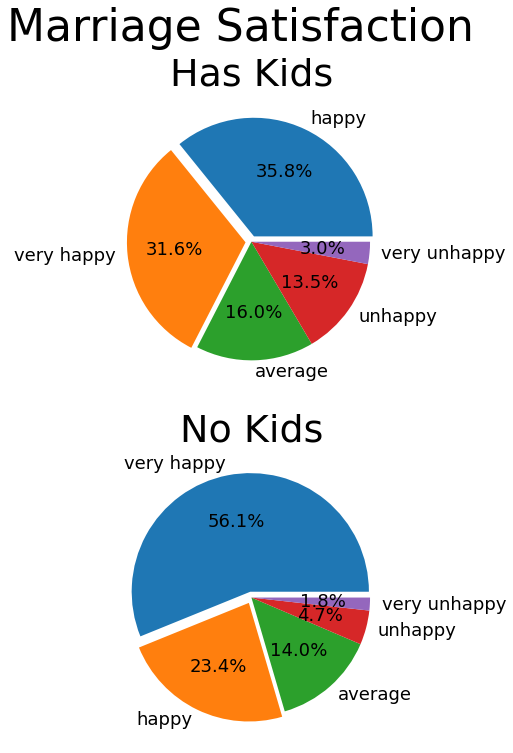

In [23]:
# We need to shrink the text or else 
plt.rcParams.update({"font.size":32})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (12,12))
a = ax[0]
affairs.groupby("haskids")["marriage"].value_counts(normalize = True).mul(100).loc["yes"].plot.pie(autopct='%1.1f%%', 
                                                                                                   fontsize = 18,
                                                                                                   explode=(.05,.05,0, 0, 0),
                                                                                                   ax = a)
a.set_ylabel("")
a.set_title("Has Kids", fontsize = 38)

a = ax[1]
affairs.groupby("haskids")["marriage"].value_counts(normalize = True).mul(100).loc["no"].plot.pie(autopct='%1.1f%%', 
                                                                                                   fontsize = 18,
                                                                                                   explode=(.05,.05,0, 0, 0),
                                                                                                   ax = a)
a.set_ylabel("")
a.set_title("No Kids", fontsize =38)
plt.suptitle("Marriage Satisfaction", fontsize = 44)

$P(B|A) = \frac{P(A|B)P(A)}{P(B)}$

So far we have calculate the probability of being married and happy, of having children, and of being happy given that you have children. But what is the probability of having children given that you are happy? 

Symbolically we can rewrite our expressions:

$P(A=Happy)=70.889\%$

$P(B=Kids)=71.5\%$

$P(A=Happy|B=Kids)=67.4\%$

We would like to solve for $P(B=Kids|A=Happy)$

$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$

$P(B|A) = \frac{(67.40\%)(71.547\%)}{70.889\%}$

$P(B|A) = 68.08\%$

In [24]:
p_kids_given_happy = (p_happy_given_kids * p_children) / p_happy
"P(B=Kids|A=Happy) = " +  str(p_kids_given_happy)

'P(B=Kids|A=Happy) = 68.07525821596244'

Now let's extrapolate this result over each of the separate categories for marriage satisfaction. we can represent each of these results graphically.

In [25]:
# calculate percentages within each subset within groupby("haskids"), not overall
affairs.groupby("marriage")["haskids"].value_counts(normalize = True).mul(100)

marriage         
very unhappy  yes    81.250000
              no     18.750000
unhappy       yes    87.878788
              no     12.121212
average       yes    74.193548
              no     25.806452
happy         yes    79.381443
              no     20.618557
very happy    yes    58.620690
              no     41.379310
Name: haskids, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\1740321642.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in ax.get_yticks()])


Text(0.5, 1.05, '\n\nChildren?')

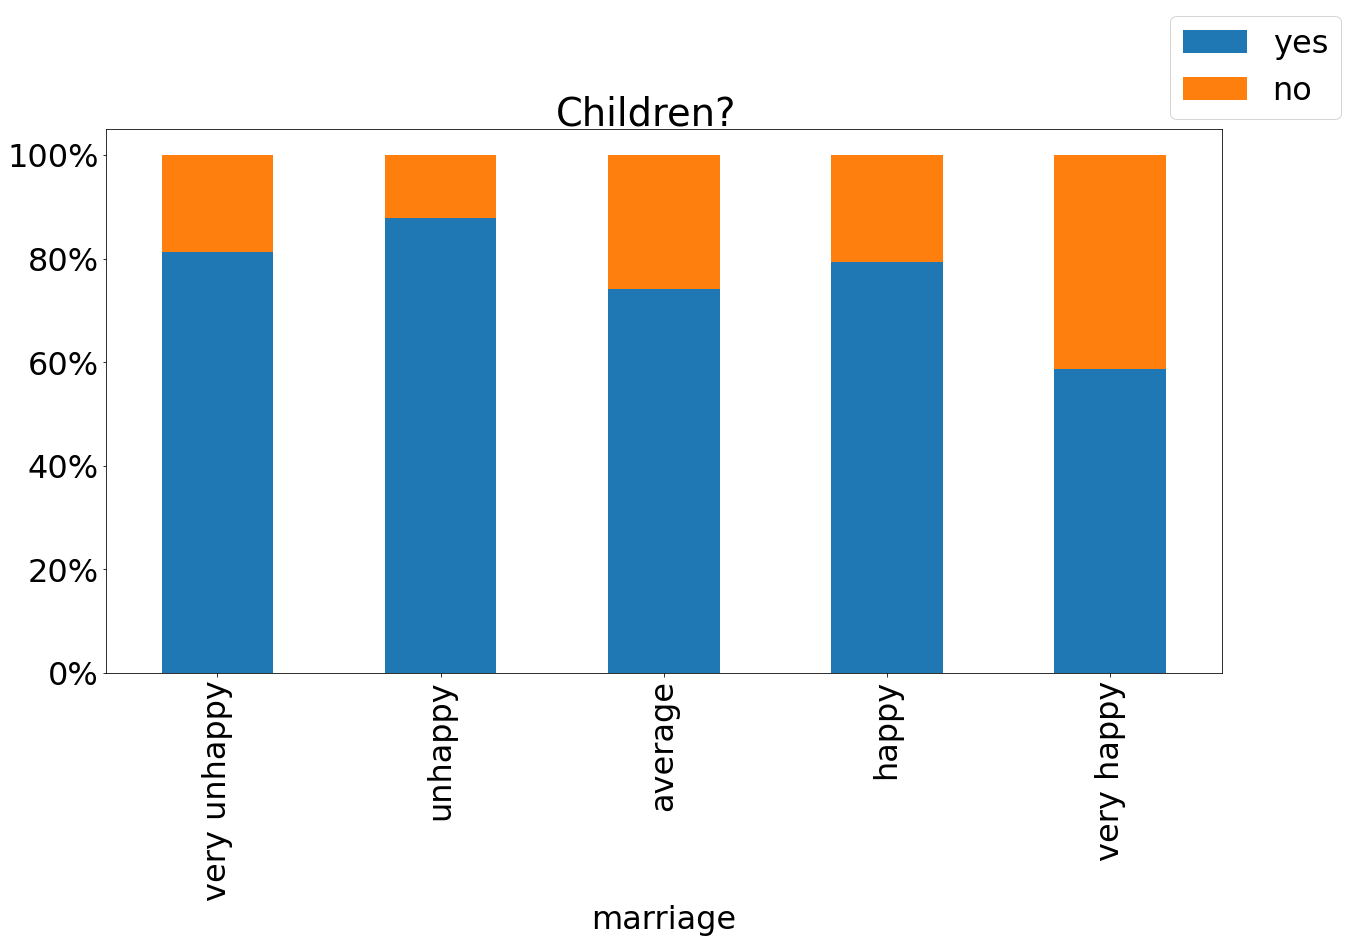

In [26]:
# stacked bar plot
# transpase unstacked df to sack by heppyness
fig, ax = plt.subplots(figsize= (20,10))
affairs.groupby("marriage")["haskids"].value_counts(normalize = True).unstack().plot.bar(ax = ax, stacked = True, legend = False)
ax.set_yticklabels([str(int(y * 100)) + "%" for y in ax.get_yticks()])
fig.legend(ncol = 1, loc = "upper right")
fig.suptitle("\n\nChildren?", y = 1.05)

It may be helpful to make new variables that aggregate the happy and unhappy ratings. We will use these variables to visualize the relationship between marital happiness and children.

In [27]:
affairs["HappyMarriage"] = 0
affairs["HappyMarriage"][affairs["ratemarr"] >2] = 1
affairs["UnhappyMarriage"] = 0
affairs["UnhappyMarriage"][affairs["ratemarr"] < 2] = 1
affairs["NotHappyMarriage"] = 0
affairs["NotHappyMarriage"][affairs["ratemarr"] <= 2] = 1
affairs.groupby("HappyMarriage")["haskids"].value_counts(normalize = True)
# affairs.groupby("HappyMarriage").count_values(normalize=True)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\4236040315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affairs["HappyMarriage"][affairs["ratemarr"] >2] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\4236040315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affairs["UnhappyMarriage"][affairs["ratemarr"] < 2] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\4236040315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

HappyMarriage     
0              yes    0.800000
               no     0.200000
1              yes    0.680751
               no     0.319249
Name: haskids, dtype: float64

### Venn Diagrams

Let's create venn diagrams with the data aggregating happiness and unhappiness. We will compare these values to the set of marriages with kids.

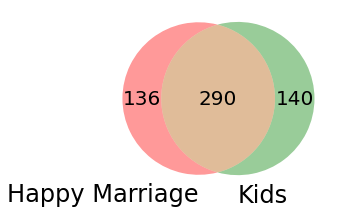

In [28]:
# !pip install matplotlib-venn
from matplotlib_venn import venn2
plt.rcParams.update({"font.size":20})

happy = affairs[(affairs['HappyMarriage'] == 1)]
kids = affairs[(affairs['haskids'] == "yes")]

plt.figure(figsize=(4,4))
happy = set(happy.index)
kids = set(kids.index)

venn2([happy, kids], ('Happy Marriage', 'Kids'))
plt.show()

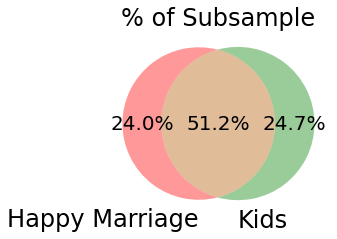

In [29]:
plt.figure(figsize=(4,4))

total = len(happy.union(kids))
venn2([happy, kids], ('Happy Marriage', 'Kids'),
     subset_label_formatter=lambda x: f"{(x/total):1.1%}")
plt.title("% of Subsample")
plt.show()

Or we could calculate percentages using the total number of observations. This is convenient since it allows us to calculate thee probability of having a happy marriage and of having children by summing the values for the shared and separate component of each circle. 

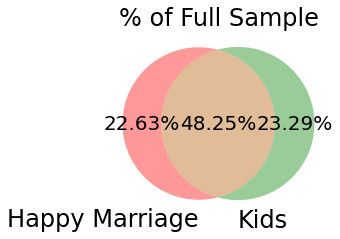

In [30]:
plt.figure(figsize=(4,4))

total = len(affairs)
plt.title("% of Full Sample")
venn2([happy, kids], ('Happy Marriage', 'Kids'),
     subset_label_formatter=lambda x: f"{(x/total):1.2%}")
plt.show()

Let's solve for $P(B=Kids|A \geq Happy)$ and $P(A \geq Happy|B=Kids)$ with information from the above figure.

$P(A=Happy)=70.89\%$

$P(B=Kids)=71.55\%$

We can also calculate the $P(B=Kids|A \geq Happy)$ and $P(A \geq Happy|B=Kids)$  by calculating the portion of circle A (B) that includes B (A). For example, 70.9\% of all marriages are happy marriages. We find that 68.06\% ($\frac{48.25\%}{70.89\%}$) of those happy marriages include children. $P(B=Kids|A \geq Happy) \approx 68.06\%$

Likewise, 71.55\% of all marriages include children. From the set of marriages with children,67.44\% ($\frac{48.25\%}{71.55\%}$) of those marriages are happy. $P(A \geq Happy|B=Kids) \approx 67.44\%$

### Survivorship Bias

It appears that there exist relatively few unhappy marriages.

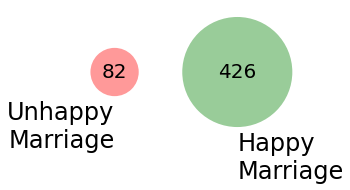

In [31]:
unhappy = affairs[(affairs['UnhappyMarriage'] == 1)] 
happy = affairs[(affairs['HappyMarriage'] == 1)]

plt.figure(figsize=(4,4))

unhappy = set(unhappy.index)
happy = set(happy.index)

venn2([unhappy, happy], ('Unhappy\nMarriage', 'Happy\nMarriage'))
plt.show()

Even if wee add average marriages, there exist more than twice as many happy marriages.

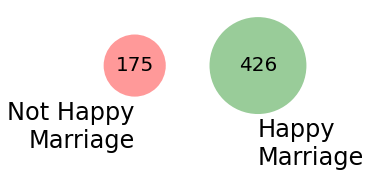

In [32]:
nothappy = affairs[(affairs['NotHappyMarriage'] == 1)] 
happy = affairs[(affairs['HappyMarriage'] == 1)]

plt.figure(figsize=(4,4))

nothappy = set(nothappy.index)
happy = set(happy.index)

venn2([nothappy, happy], ('Not Happy\nMarriage', 'Happy\nMarriage'))
plt.show()

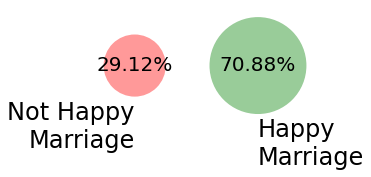

In [33]:
nothappy = affairs[(affairs['NotHappyMarriage'] == 1)] 
happy = affairs[(affairs['HappyMarriage'] == 1)]

plt.figure(figsize=(4,4))

nothappy = set(nothappy.index)
happy = set(happy.index)
total = len(affairs)

venn2([nothappy, happy], ('Not Happy\nMarriage', 'Happy\nMarriage'),
          subset_label_formatter=lambda x: f"{(x/total):1.2%}")
plt.show()

If you look closely at the data set, however, divorces are not included. If we thought of divorces as indicating unhappy marriages, it is likely that the total number of inhappy marriages, whether or not divorced, would be greater than the number of happy marriages. The data set does not include data about divorce, so we can only speculate without further information.

### Discursion on _.crosstab()_ method

The *crosstab()* method is another means of generating this partition. It also can include a column that sums  results across all values of the categorical variable.

In [34]:
count_all = pd.crosstab(affairs["marriage"],affairs["haskids"], margins = 3)
count_all

haskids,no,yes,All
marriage,,,
very unhappy,3,13,16
unhappy,8,58,66
average,24,69,93
happy,40,154,194
very happy,96,136,232
All,171,430,601


In [35]:
# calculate overall percentage
percent_all = pd.crosstab(affairs["marriage"],affairs["haskids"],  normalize = True).mul(100)
percent_all

haskids,no,yes
marriage,,
very unhappy,0.499168,2.163062
unhappy,1.331115,9.650582
average,3.993344,11.480865
happy,6.655574,25.623960
very happy,15.973378,22.628952


In [36]:
percent_by_happiness =  pd.crosstab(affairs["marriage"],affairs["haskids"],  normalize = "index").mul(100)
percent_by_happiness

haskids,no,yes
marriage,,
very unhappy,18.750000,81.250000
unhappy,12.121212,87.878788
average,25.806452,74.193548
happy,20.618557,79.381443
very happy,41.379310,58.620690


In [37]:
percent_by_haskids =  pd.crosstab(affairs["marriage"],affairs["haskids"],  normalize = "columns").mul(100)
percent_by_haskids

haskids,no,yes
marriage,,
very unhappy,1.754386,3.023256
unhappy,4.678363,13.488372
average,14.035088,16.046512
happy,23.391813,35.813953
very happy,56.140351,31.627907


In [38]:
affairs.keys()

Index(['male', 'age', 'yrsmarr', 'kids', 'relig', 'educ', 'occup', 'ratemarr',
       'naffairs', 'affair', 'vryhap', 'hapavg', 'avgmarr', 'unhap', 'vryrel',
       'smerel', 'slghtrel', 'notrel', 'marriage', 'haskids', 'HappyMarriage',
       'UnhappyMarriage', 'NotHappyMarriage'],
      dtype='object')

### 1.5.2 Continuous Distributions: Histogram and Density;

In [39]:
ceosal1 = woo.dataWoo('ceosal1')
ceosal1

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


<AxesSubplot:xlabel='Return on Investment', ylabel='Frequency'>

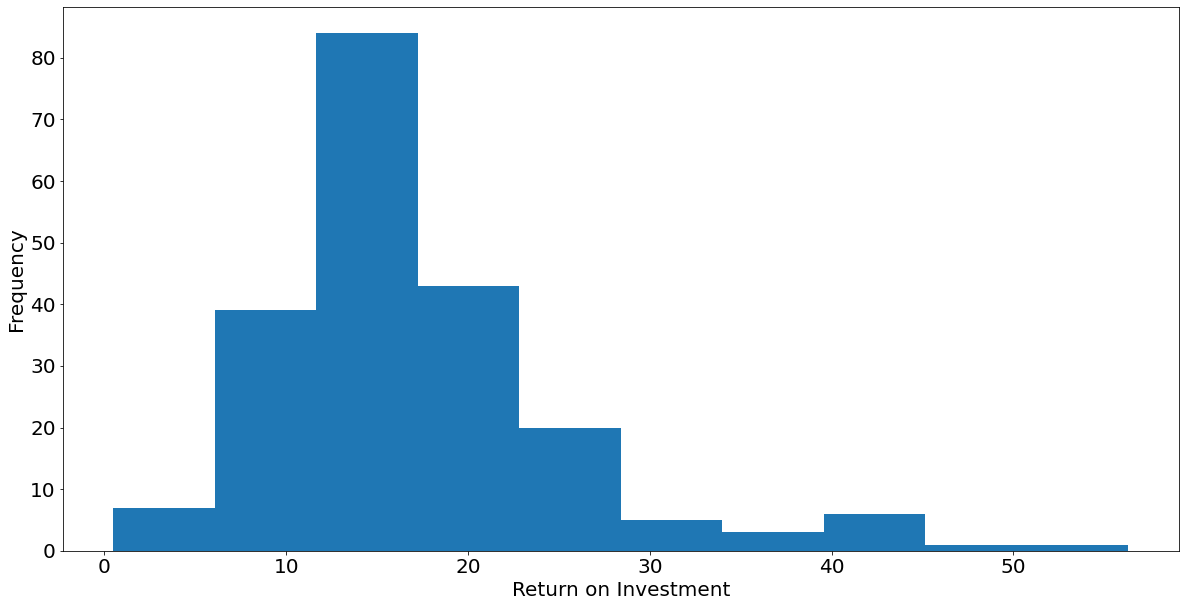

In [40]:
roe = ceosal1[["roe"]]
fig,ax = plt.subplots(figsize = (20,10))
ax.set_xlabel("Return on Investment")
roe.plot.hist(ax=ax, legend = False)

<AxesSubplot:xlabel='Return on Investment', ylabel='Frequency'>

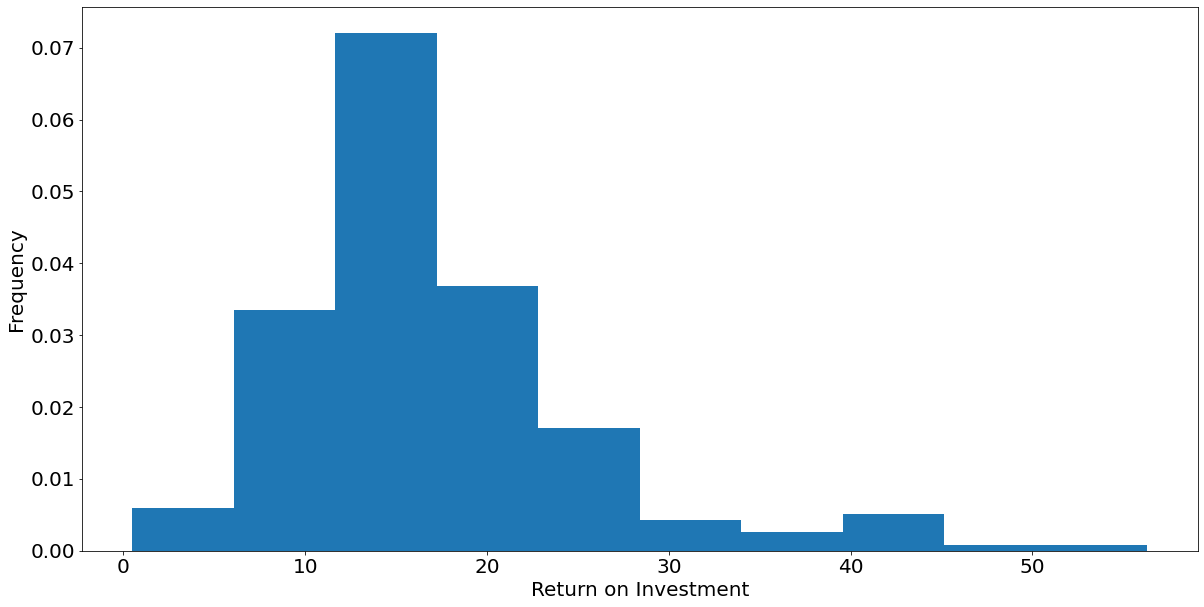

In [41]:
roe = ceosal1[["roe"]]
fig,ax = plt.subplots(figsize = (20,10))
ax.set_xlabel("Return on Investment")
roe.plot.hist(ax=ax, legend = False, density = True)

In [42]:
import statsmodels.api as sm
kde =sm.nonparametric.KDEUnivariate(roe)
kde.fit()

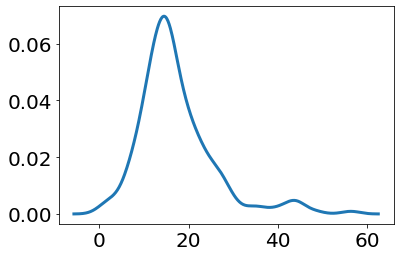

In [43]:
plt.plot(kde.support, kde.density, linewidth = 3)

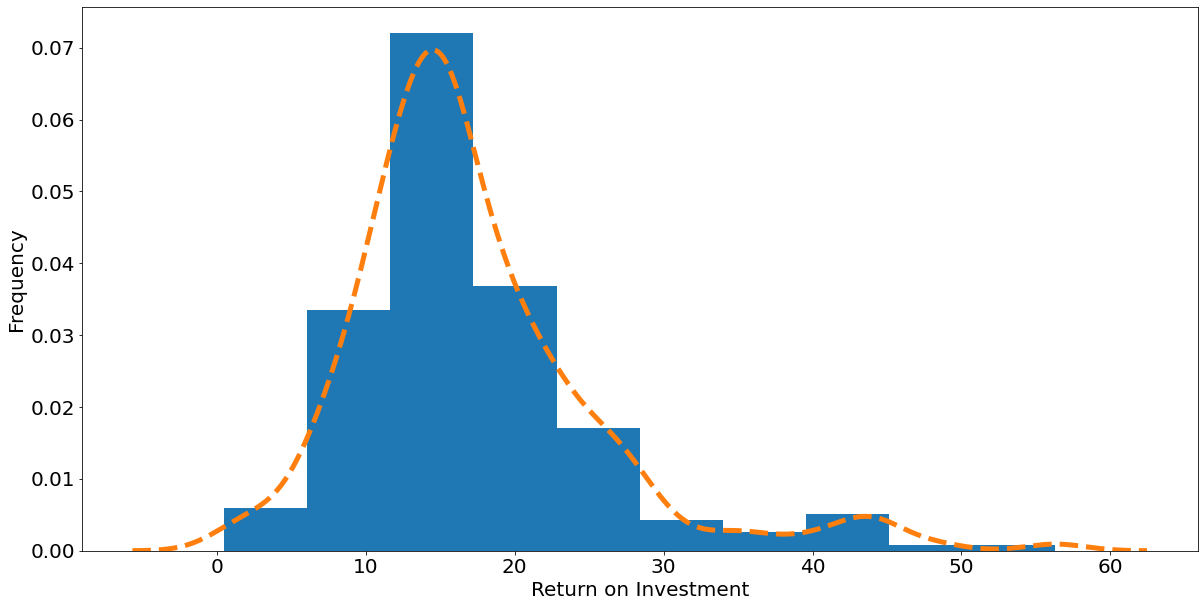

In [44]:
roe = ceosal1[["roe"]]
fig,ax = plt.subplots(figsize = (20,10))
ax.set_xlabel("Return on Investment")
roe.plot.hist(ax=ax, legend = False, density = True)
ax.plot(kde.support, kde.density, linewidth = 5, ls ="--")

#### CDF

<AxesSubplot:ylabel='Frequency'>

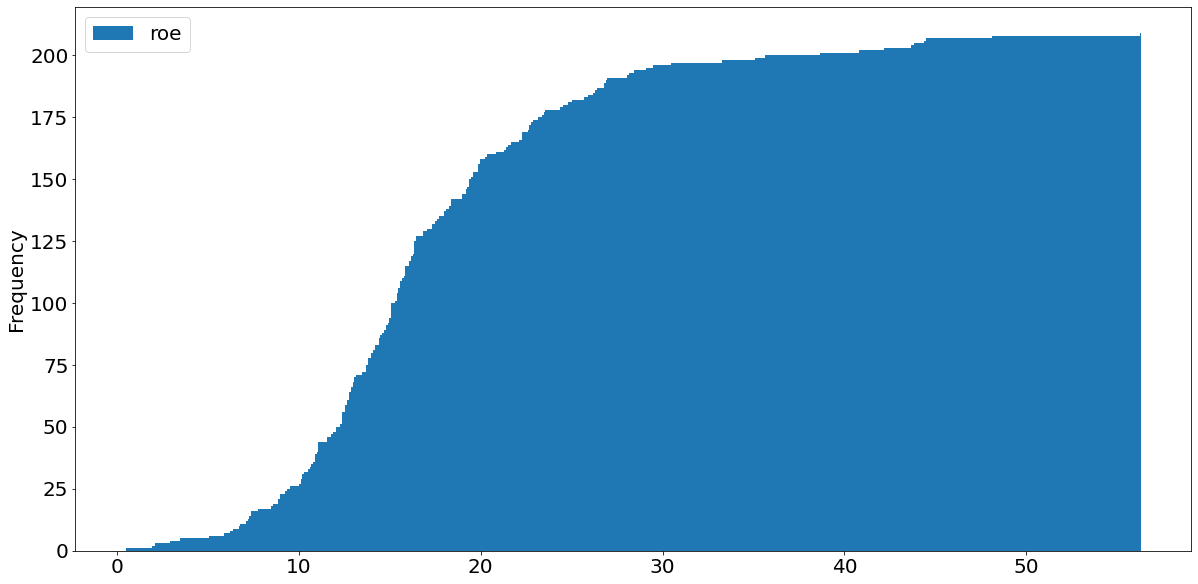

In [45]:
fig,ax = plt.subplots(figsize = (20,10))
roe.plot.hist(cumulative=True, bins = 1000, ax = ax, linewidth = 5) # histtype="step")

In [46]:
import numpy as np
roe_summary = roe.describe()
roe_summary.loc["median"] = roe.median()

In [47]:
ceosal1.corr()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
salary,1.000000,0.008672,0.119869,0.114842,0.028710,-0.033682,-0.071134,0.024754,0.204546,-0.184309,0.794208,0.194092
pcsalary,0.008672,1.000000,0.017010,0.087335,0.207962,0.137778,0.004436,-0.090806,0.051999,0.031853,0.043843,-0.065224
sales,0.119869,0.017010,1.000000,-0.055386,0.005594,-0.136088,0.093608,-0.054073,0.069175,-0.139245,0.281286,0.742921
roe,0.114842,0.087335,-0.055386,1.000000,0.004191,0.274919,0.013461,-0.178531,0.408517,-0.310194,0.208499,-0.122553
pcroe,0.028710,0.207962,0.005594,0.004191,1.000000,0.128940,-0.029602,0.091720,-0.015684,-0.045260,0.107694,0.023288
ros,-0.033682,0.137778,-0.136088,0.274919,0.128940,1.000000,-0.209504,-0.107987,0.347821,-0.039299,-0.074565,-0.350330
indus,-0.071134,0.004436,0.093608,0.013461,-0.029602,-0.209504,1.000000,-0.364904,-0.435889,-0.313344,-0.016146,0.060278
finance,0.024754,-0.090806,-0.054073,-0.178531,0.091720,-0.107987,-0.364904,1.000000,-0.337107,-0.242333,0.100841,0.039025
consprod,0.204546,0.051999,0.069175,0.408517,-0.015684,0.347821,-0.435889,-0.337107,1.000000,-0.289475,0.220285,-0.019071
utility,-0.184309,0.031853,-0.139245,-0.310194,-0.045260,-0.039299,-0.313344,-0.242333,-0.289475,1.000000,-0.354615,-0.094472


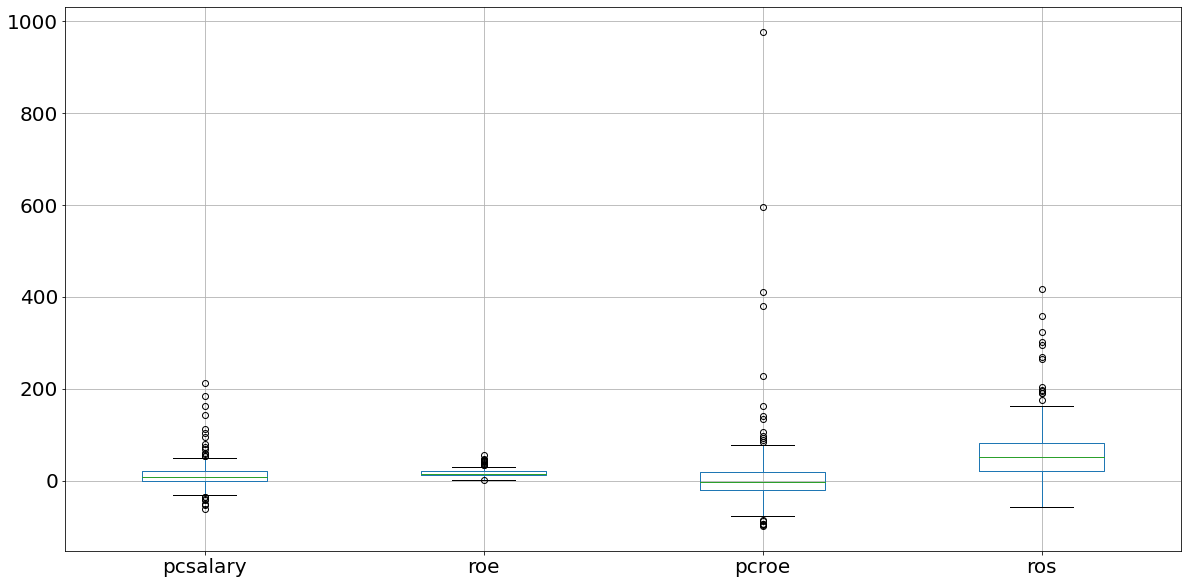

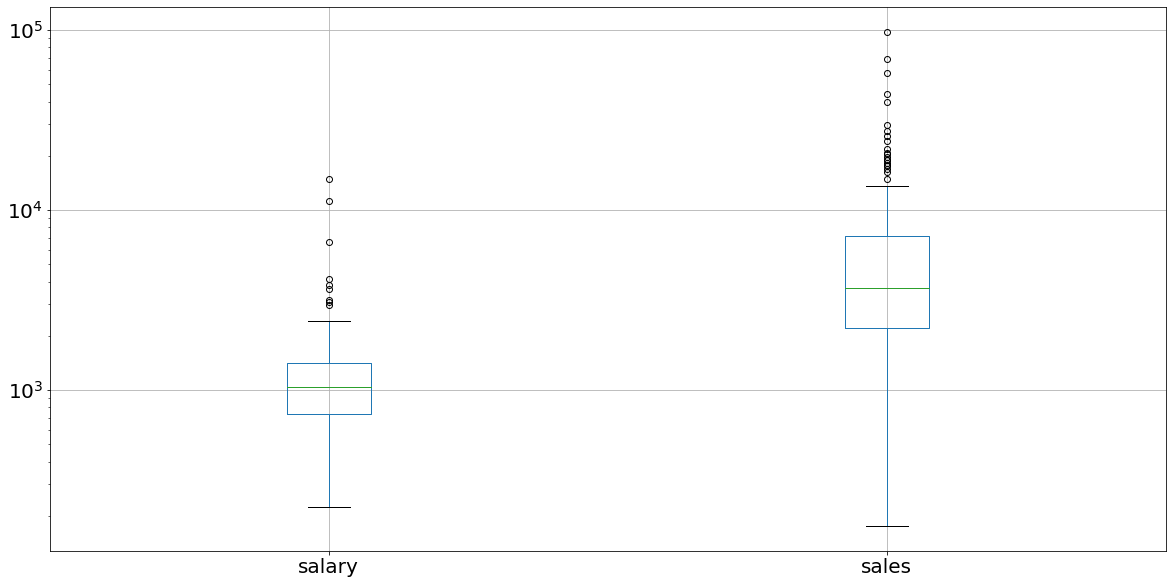

In [48]:
keys = ["pcsalary", "roe", "pcroe", "ros"]
keys2 = ["salary", "sales"]

fig,ax = plt.subplots(figsize = (20,10))
ceosal1[keys].boxplot(ax = ax)
fig,ax = plt.subplots(figsize = (20,10))
ceosal1[keys2].boxplot(ax = ax)
ax.set_yscale("log")

## 1.6 Probability Distributions

### Discrete Distributions
#### Binomial Distribution

Suppose that you are drawing balls from a bag. 20\% of the balls are white, 80\% are black. We define the probability that you will draw x white balls in 10 draws as follows

$f(x) = P(X = x) = {n\choose k}  p^x(1-p)^{n-x}={10\choose k}  0.2^x(0.8)^{10-x}$



In [49]:
import scipy.stats as stats
import math

def binomial(x, n, px):
    c = math.factorial(n) / (math.factorial(x) * math.factorial(n-x))
    p = c * (px ** x) * ((1 - px) ** (n - x))
    return p
x = 2
n = 10
px =.2
binomial(x = x,n = n, px = px)

0.3019898880000002

In [50]:
stats.binom.pmf(x,n,px)

0.30198988800000004

In [51]:
lin_x = np.linspace(0, n, num = n+1)
fx = stats.binom.pmf(lin_x, n, px)
lin_x, fx

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([1.07374182e-01, 2.68435456e-01, 3.01989888e-01, 2.01326592e-01,
        8.80803840e-02, 2.64241152e-02, 5.50502400e-03, 7.86432000e-04,
        7.37280000e-05, 4.09600000e-06, 1.02400000e-07]))

In [52]:
binomial_df = pd.DataFrame({"x":lin_x,"fx":fx}).set_index("x")
binomial_df

,fx
x,
0.0,1.073742e-01
1.0,2.684355e-01
2.0,3.019899e-01
3.0,2.013266e-01
4.0,8.808038e-02
5.0,2.642412e-02
6.0,5.505024e-03
7.0,7.864320e-04
8.0,7.372800e-05


C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\3937442764.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y* 100))+"%" for y in ax.get_yticks()])


Text(0.5, 1.0, 'Binomial Distribution\n $n=10,  p(x)=0.2$')

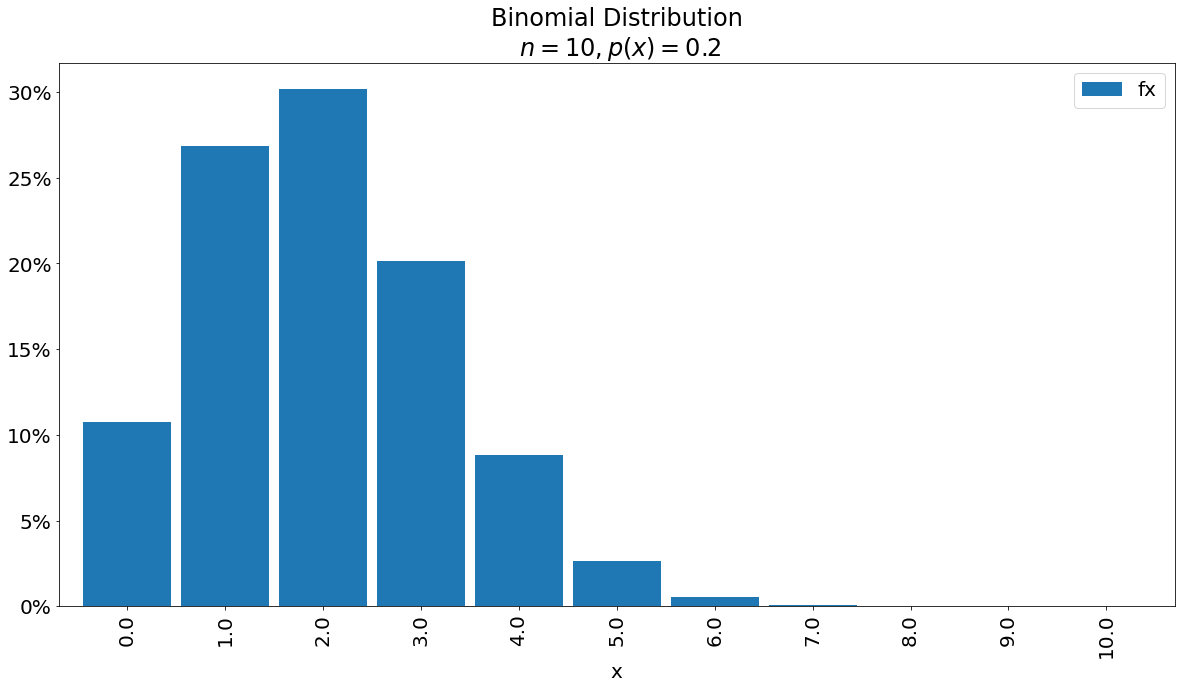

In [53]:
fig,ax = plt.subplots(figsize = (20,10))
binomial_df.plot.bar(ax = ax, width = .9)
ax.set_yticklabels([str(int(y* 100))+"%" for y in ax.get_yticks()])
if n > 40:
    ax.set_xticklabels([str(x) if x % 5 ==0 else "" for x in ax.get_xticks()])
ax.set_title("Binomial Distribution\n $n=" + str(n)+ ",  p(x)=" + str(px) + "$")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\1834206997.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y* 100))+"%" for y in ax.get_yticks()])


Text(0.5, 1.0, 'Binomial Cumulative Distribution\n $n=10,  p(x)=0.2$')

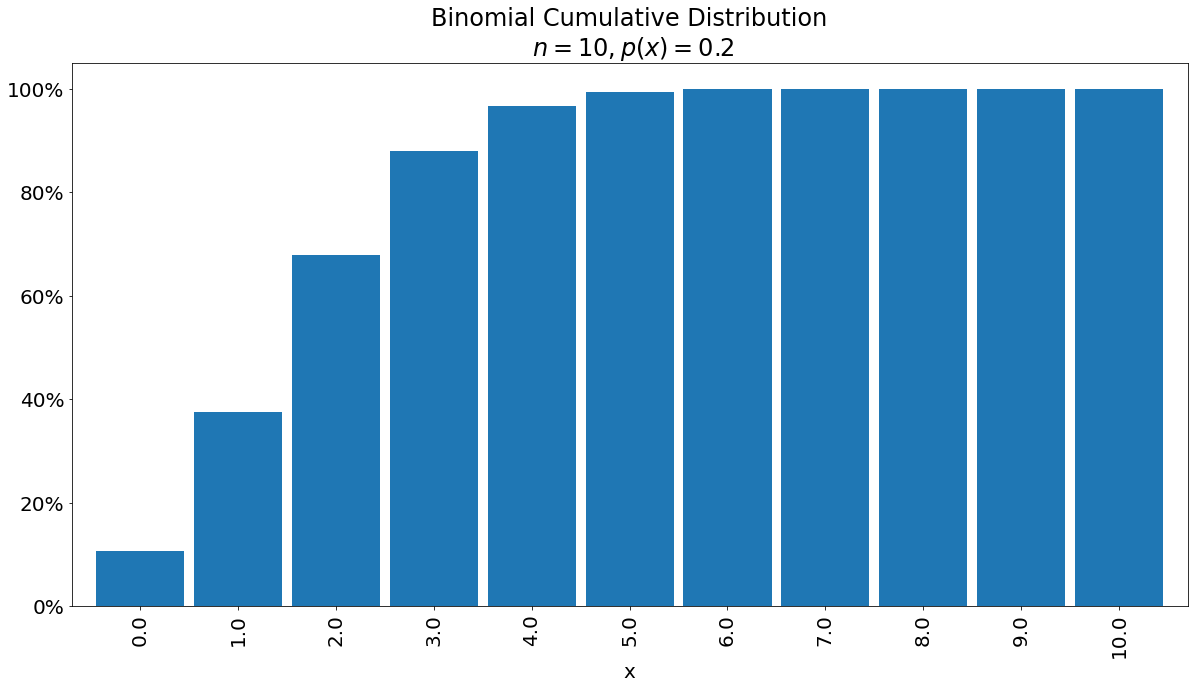

In [54]:
fig,ax = plt.subplots(figsize = (20,10))
binomial_df.cumsum().plot.bar(ax = ax, 
                              width = .9,
                             legend= False)
ax.set_yticklabels([str(int(y* 100))+"%" for y in ax.get_yticks()])
if n > 40:
    ax.set_xticklabels([str(x) if x % 5 ==0 else "" for x in ax.get_xticks()])
ax.set_title("Binomial Cumulative Distribution\n $n=" + str(n)+ ",  p(x)=" + str(px) + "$")

### 1.6.2 Continuous Distributions
#### Standard Normal Distribution

In [55]:
x_range = np.linspace(-5,5, num = 1000)
pdf = stats.norm.pdf(x_range)
pdf

array([1.48671951e-06, 1.56294518e-06, 1.64291438e-06, 1.72680223e-06,
       1.81479157e-06, 1.90707332e-06, 2.00384677e-06, 2.10531999e-06,
       2.21171010e-06, 2.32324372e-06, 2.44015731e-06, 2.56269761e-06,
       2.69112199e-06, 2.82569895e-06, 2.96670852e-06, 3.11444274e-06,
       3.26920615e-06, 3.43131624e-06, 3.60110404e-06, 3.77891458e-06,
       3.96510749e-06, 4.16005756e-06, 4.36415530e-06, 4.57780761e-06,
       4.80143840e-06, 5.03548920e-06, 5.28041992e-06, 5.53670947e-06,
       5.80485658e-06, 6.08538047e-06, 6.37882168e-06, 6.68574289e-06,
       7.00672970e-06, 7.34239154e-06, 7.69336257e-06, 8.06030255e-06,
       8.44389784e-06, 8.84486240e-06, 9.26393876e-06, 9.70189908e-06,
       1.01595463e-05, 1.06377152e-05, 1.11372736e-05, 1.16591234e-05,
       1.22042022e-05, 1.27734842e-05, 1.33679815e-05, 1.39887459e-05,
       1.46368699e-05, 1.53134881e-05, 1.60197791e-05, 1.67569666e-05,
       1.75263212e-05, 1.83291622e-05, 1.91668589e-05, 2.00408326e-05,
      

In [56]:
pdf_df = pd.DataFrame({"x":x_range,"Standard Normal Distribution":pdf}).set_index("x")
pdf_df

,Standard Normal Distribution
x,
-5.00000,0.000001
-4.98999,0.000002
-4.97998,0.000002
-4.96997,0.000002
-4.95996,0.000002
...,...
4.95996,0.000002
4.96997,0.000002
4.97998,0.000002


<AxesSubplot:xlabel='x'>

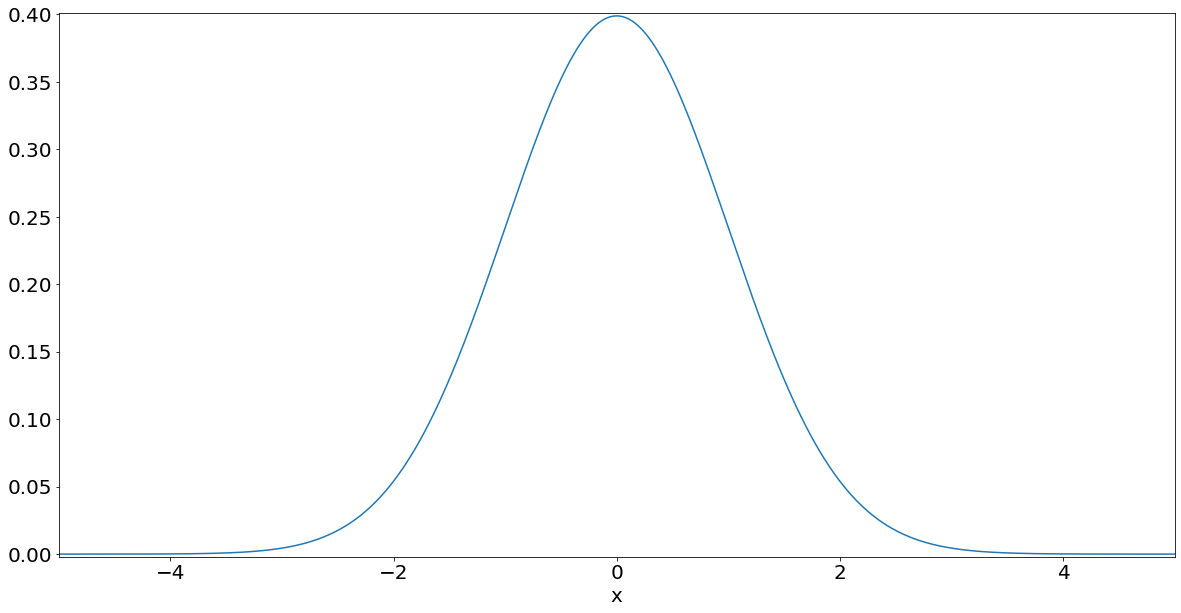

In [57]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.005
fig,ax = plt.subplots(figsize = (20,10))
pdf_df.plot.line(ax = ax,legend = False)

#### Calculating area under the curve between two values $x_1 and x_2$

In [58]:
stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)

0.950004209703559

$X~Normal(4,9)$

Calculate $P(2<X \le 6)$

$P(|X|>2) = 1 - P(X \le 2) + P(X < -2)$

$stats.norm.cdf(x, loc=0, scale=1)$

In [59]:
# in the first case, we assume distribution is centered at 0
p1_1a = stats.norm.cdf(2/3) 
p1_1b = stats.norm.cdf(-2/3)
p1_1 = p1_1a - p1_1b

# compare to if distribution is centered at 4 with sd = 3 (variance = 9)
# we calculate the smae areas under the curve.
p1_2a  = stats.norm.cdf(6,4,3) 
p1_2b = stats.norm.cdf(2,4,3)
p1_2 = p1_2a - p1_2b

# 1 minus area in domain (-2,2]
p2a = stats.norm.cdf(2,4,3) 
p2b = stats.norm.cdf(-2,4,3)
p2 = 1 - (p2a - p2b)

In [60]:
p1_1a, p1_1b, p1_1

(0.7475074624530771, 0.2524925375469229, 0.4950149249061542)

In [61]:
p1_2a, p1_2b, p1_2

(0.7475074624530771, 0.2524925375469229, 0.4950149249061542)

In [62]:
p2a, p2b, p2

(0.2524925375469229, 0.022750131948179195, 0.7702575944012563)

Build binomial and standard normal cdfs. Save $x$ and $y$ values in dataframe with $x$ as index.

In [63]:
x_binom = np.linspace(-1,10, num =1000)
binom_cdf = pd.DataFrame(zip(x_binom,stats.binom.cdf(x_binom, 10, .5)), columns=["x","y"]).set_index("x")
binom_cdf

,y
x,
-1.000000,0.000000
-0.988989,0.000000
-0.977978,0.000000
-0.966967,0.000000
-0.955956,0.000000
...,...
9.955956,0.999023
9.966967,0.999023
9.977978,0.999023


In [64]:
x_norm = np.linspace(-4,4, num=1000)
norm_cdf = pd.DataFrame(zip(x_norm, stats.norm.cdf(x_norm)), columns = ["x","y"]).set_index("x")
norm_cdf

,y
x,
-4.000000,0.000032
-3.991992,0.000033
-3.983984,0.000034
-3.975976,0.000035
-3.967968,0.000036
...,...
3.967968,0.999964
3.975976,0.999965
3.983984,0.999966


C:\Users\JLCat\AppData\Local\Temp\ipykernel_31204\1067950917.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y*100)) + "%" for y in a.get_yticks()])


Text(0.5, 0.96, '  CDF')

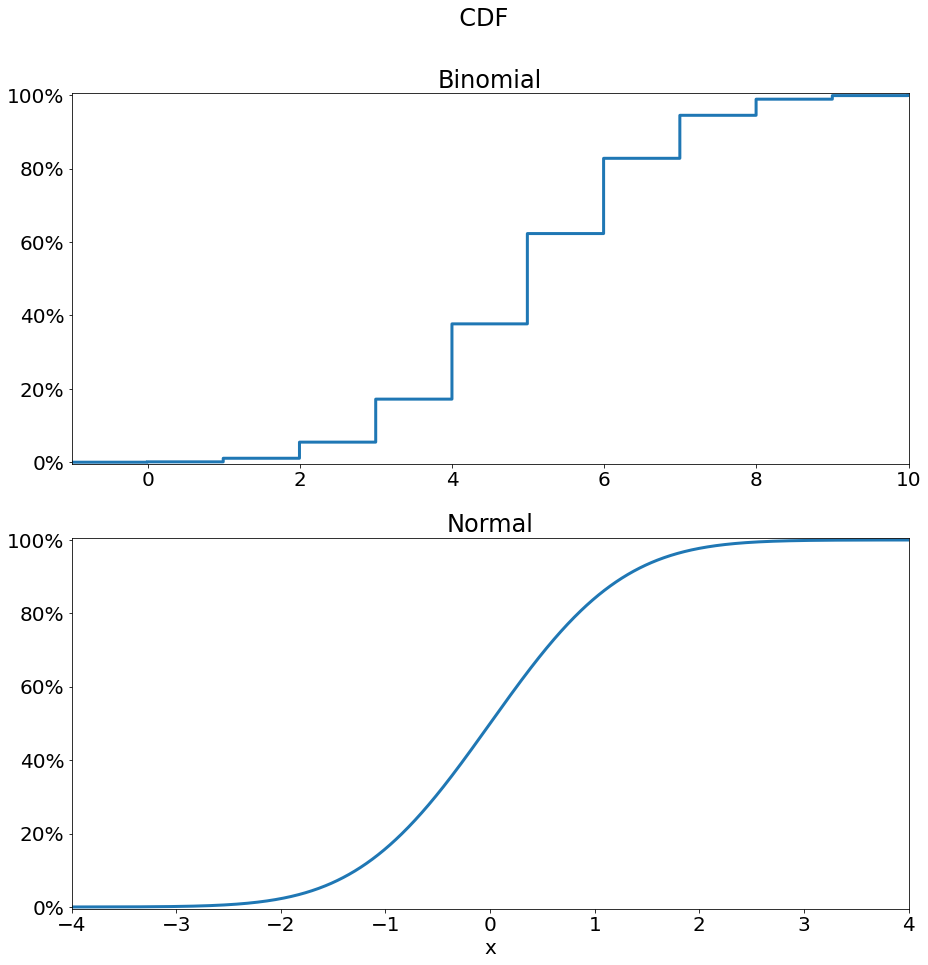

In [65]:
fig, ax = plt.subplots(2,1,figsize = (15,15))
binom_cdf.plot(drawstyle = "steps", 
               ax = ax[0],
               linewidth = 3,
              legend = False)
norm_cdf.plot(ax = ax[1],
              linewidth = 3,
             legend = False)
for i in range(0,2):
    a = ax[i]
    if i == 0:
        a.set_xlabel("")
    a.set_title("Binomial") if i == 0 else a.set_title("Normal")
    a.set_yticklabels([str(int(y*100)) + "%" for y in a.get_yticks()])
fig.suptitle("  CDF", y = .96)


#### Quantile Function

We can use the ppf function to rank a given distirbution value (SDs from mean) compared to the rest of values in the distribution. (i.e., what percentage of outcomes have a lower x-value). 

In this example, we use a for loop to approximate quantiles for ever .5 units in the percentile ranking. This is essentially the reconstruction of a cdf, but we will be using the percentile as an index instead of the x-value.

In [66]:
quantiles = {round(i / 200, 3) * 100:stats.norm.ppf(round(i / 200, 3))  for i in range(0,201)}
quantiles = pd.DataFrame(quantiles, index = ["SD from Mean"]).T
quantiles.index.name = "Percentile"
quantiles    

,SD from Mean
Percentile,
0.0,-inf
0.5,-2.575829
1.0,-2.326348
1.5,-2.170090
2.0,-2.053749
...,...
98.0,2.053749
98.5,2.170090
99.0,2.326348


Text(0, 0.5, 'SD from Mean')

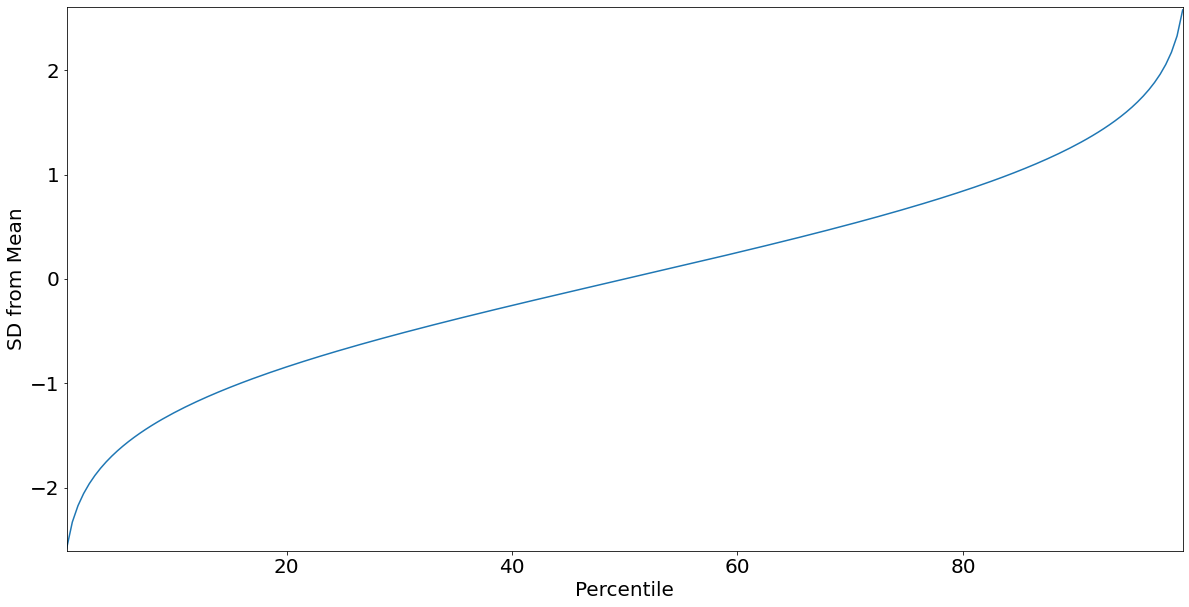

In [67]:
fig,ax = plt.subplots(figsize=(20,10))
quantiles.plot(legend=False, ax = ax)
ax.set_ylabel(list(quantiles.keys())[0])

### 1.6.4 Random Draws from Probabilbility Distributions

#### Variance

$var_{pop} = \frac{\sum_{i=0}^{n-1} (x_{i} - \bar{x})^2} {n}$

When we are dealing with a sample, which is a subset of a population of observations, then we divide by (n - 1) to unbias the calculation.

$var_{samp} = \frac{\sum_{i=0}^{n-1} (x_{i} - \bar{x})^2} {n - 1}$


#### Standard Deviation

$s = \sqrt{variance}$

#### Bernoulli Distribution

In [68]:
bernoulli_sample = stats.bernoulli.rvs(.5, size = 100)

np.mean(bernoulli_sample), np.std(bernoulli_sample)

(0.54, 0.49839743177508444)

#### Standard Normal

In [69]:
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
normal_sample,np.mean(normal_sample), np.std(normal_sample)

(array([-0.25136864, -0.70925634,  1.07131972,  0.30757482, -0.60172169,
         0.44593303,  0.86579994,  1.86502624,  0.06728108,  0.28148913,
         1.2381308 ,  1.04020614,  2.01394978,  0.8144867 , -0.66827753,
         0.59039829,  0.3331364 , -0.79200422,  0.58674497, -0.09677269,
         1.55466774, -1.08097402, -0.7386192 ,  0.648073  , -0.42604097,
         0.73279256,  1.14290551,  0.00714993,  0.19271065, -0.72204136,
         0.92485596, -0.20480723,  0.5227719 , -0.21660781,  1.44994598,
        -0.56399985, -0.6792435 , -1.67088028, -0.13730337,  1.4428354 ,
        -0.57904698, -0.51340696,  0.77213338,  0.41534535, -0.64974862,
         0.33285256, -1.2274263 , -0.13770888, -0.19111387,  0.30131082,
         2.01781596,  0.18439148, -0.87424488, -1.41404614,  0.18115296,
         0.8935226 ,  0.49679253, -0.82919572,  1.00692599,  2.1593115 ,
         0.81628337, -1.1790892 , -2.20133211, -1.04826264,  0.38054413,
         0.38398607, -0.0966537 ,  0.00827327, -1.3

We can set the random seed. Random numbers are generated deterministically in light of the seed selected. The default is to use time as the seed. By selecting a seed, you make your results repeatable. We will select a seed, generate two sets of resuls, and repeat to exemplify this process.

In [70]:
np.random.seed(0)
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
np.mean(normal_sample), np.std(normal_sample)

(0.059808015534485, 1.0078822447165796)

In [71]:
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
np.mean(normal_sample), np.std(normal_sample)

(0.08201297074783735, 1.0346669974384226)

In [72]:
np.random.seed(0)
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
np.mean(normal_sample), np.std(normal_sample)

(0.059808015534485, 1.0078822447165796)

In [73]:
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
np.mean(normal_sample), np.std(normal_sample)

(0.08201297074783735, 1.0346669974384226)

In [74]:
# reset seed to default (uses time to set seed)
np.random.seed()
normal_sample = stats.norm.rvs(loc = 0, scale = 1, size=100)
np.mean(normal_sample), np.std(normal_sample)

(0.08520647080038346, 1.034580043688958)

## 1.7 Confidence Intervals and Statistical Inference

### Confidence Intervals
Confidence intervals use the standard error to calculate the confidence that are mean is statistically significant across some range of values. For example, suppose that we want to estimate a mean of a two-tailed distribution with 95% confidence. That is, what is the range of values where we leave out only the values less than the 2.5\% quantile or greater than the 97.5\% quantile?

We write this as:

$[(\bar{y} - c_{\frac{\alpha}{2}})SE(\bar{y}), (\bar{y} + c_{\frac{\alpha}{2}})SE(\bar{y})]$

For a sample, we calculate the standard error of y, $SE(y)$ as $\frac{s}{\sqrt{n}}$ where $s$ is sample standard deviation:

$[(\bar{y} - c_{\frac{\alpha}{2}})\frac{s}{\sqrt{n}}, (\bar{y} + c_{\frac{\alpha}{2}})\frac{s}{\sqrt{n}}]$

$\alpha$ indicates statistical significance, which is $1 - CI$. $\bar{y}$ +/- $\frac{\alpha}{2}$ accounts for the outer area of the distribution not covered by the confidence interval.


In [75]:
def calculate_CI(lst, CI = .95, dof = 1):
    alpha = 1 - CI
    half_alpha = alpha / 2
    stats_dct = {}
    stats_dct["mean"] = np.mean(lst)
    stats_dct["n"] = len(lst)
    stats_dct["sd"] = np.std(lst, ddof = dof)
    stats_dct["se"] = stats_dct["sd"] / np.sqrt(stats_dct["n"])
    stats_dct["c"] = stats.t.ppf(CI + half_alpha, stats_dct["n"] - dof)
    stats_dct["lowerCI"] = stats_dct["mean"] - stats_dct["c"] * stats_dct["se"]
    stats_dct["upperCI"] = stats_dct["mean"] + stats_dct["c"] * stats_dct["se"]
    return stats_dct

SR87 = np.array([10, 1, 6, .45, 1.25, 1.3, 1.06, 3, 8.18, 1.67,
        .98, 1, .45, 5.03, 8, 9, 18, .28, 7, 3.97])
SR88 = np.array([3, 1, 5, .5, 1.54, 1.5, .8, 2, .67, 1.17, .51,
       .5, .61, 6.7, 4, 7, 19, .2, 5, 3.83])

In [76]:
calculate_CI(SR87)

{'mean': 4.381,
 'n': 20,
 'sd': 4.57521802759169,
 'se': 1.0230498521577527,
 'c': 2.093024054408263,
 'lowerCI': 2.2397320505750065,
 'upperCI': 6.522267949424994}

In [77]:
calculate_CI(SR88)

{'mean': 3.2265,
 'n': 20,
 'sd': 4.289549448798114,
 'se': 0.9591724160359336,
 'c': 2.093024054408263,
 'lowerCI': 1.218929060911901,
 'upperCI': 5.234070939088099}

In [78]:
diff_CI = calculate_CI(SR88 - SR87)
diff_CI = pd.DataFrame(diff_CI, index = ["Value"]).T.round(3)
diff_CI

,Value
mean,-1.154
n,20.000
sd,2.401
se,0.537
c,2.093
lowerCI,-2.278
upperCI,-0.031


<AxesSubplot:>

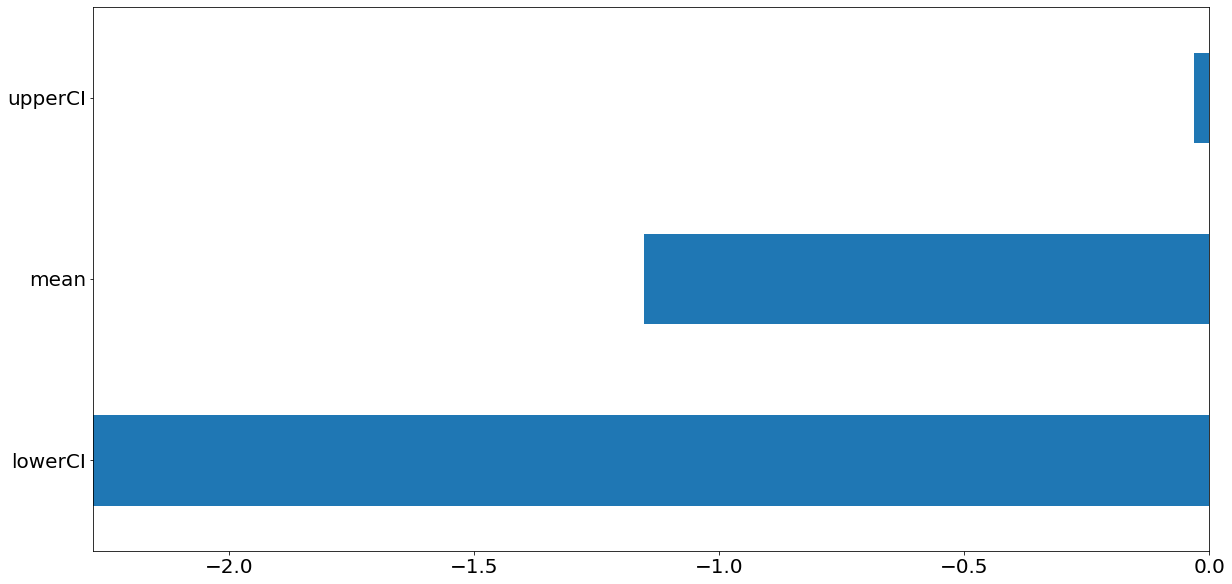

In [79]:
plot_vars = ["lowerCI","mean", "upperCI"]
plot_df =diff_CI.loc[plot_vars]
fig, ax = plt.subplots(figsize=(20,10))
plot_df.plot.barh(ax = ax, legend = False)

In [80]:
audit = woo.dataWoo("audit")
audit_95CI = calculate_CI(audit["y"], CI = .95)
audit_95CI

{'mean': -0.13278008298755187,
 'n': 241,
 'sd': 0.48197094200272456,
 'se': 0.031046477602370556,
 'c': 1.9698976350757682,
 'lowerCI': -0.19393846579389443,
 'upperCI': -0.07162170018120931}

In [81]:
audit_99CI = calculate_CI(audit["y"], CI = .99)
audit_99CI

{'mean': -0.13278008298755187,
 'n': 241,
 'sd': 0.48197094200272456,
 'se': 0.031046477602370556,
 'c': 2.5964691819561625,
 'lowerCI': -0.21339130529039926,
 'upperCI': -0.05216886068470447}

### 1.7.2 *t* Tests

#### Hypothesis Testing

$H_0: \mu = \mu_0$

$t = \frac{\bar{y} - \mu_0}{SE(\bar{y})}$

We will test the null hypothesis:

$H_0: \mu = 0$

$H_A: \mu \ne 0$.

We draw the statistical significance of a t-statistic from the t-distribution. The

In [82]:
dof = 1000
alpha_one_tailed = np.array([.1, .05, .025, .01, .005, .001])
alpha_two_tailed = alpha_one_tailed * 2
t_stats = stats.t.ppf(1 - alpha_one_tailed, dof)
critical_values = pd.DataFrame({"Alpha One Tailed":alpha_one_tailed,
                  "Alpha Two Tailed":alpha_two_tailed,
                  "t-statistic":t_stats})
critical_values

,Alpha One Tailed,Alpha Two Tailed,t-statistic
0,0.100,0.200,1.282399
1,0.050,0.100,1.646379
2,0.025,0.050,1.962339
3,0.010,0.020,2.330083
4,0.005,0.010,2.580755
5,0.001,0.002,3.098402


### Wooldridge, Example C.5: Race Discrimination in Hiring

In [83]:
audit = woo.dataWoo("audit")

test_auto = stats.ttest_1samp(audit["y"], popmean=0)
t_auto = test_auto.statistic
p_auto = test_auto.pvalue
test_auto, t_auto, p_auto / 2

(Ttest_1sampResult(statistic=-4.276816348963646, pvalue=2.738541562225998e-05),
 -4.276816348963646,
 1.369270781112999e-05)

In [84]:
#develop from calculate CI
def calculate_statistics(lst, CI = .95, dof = 1):
    alpha = 1 - CI
    half_alpha = alpha / 2
    stats_dct = {}
    stats_dct["mean"] = np.mean(lst)
    stats_dct["n"] = len(lst)
    stats_dct["sd"] = np.std(lst, ddof = dof)
    stats_dct["se"] = stats_dct["sd"] / np.sqrt(stats_dct["n"])
    stats_dct["c"] = stats.t.ppf(CI + half_alpha, stats_dct["n"] - dof)
    stats_dct["lowerCI"] = stats_dct["mean"] - stats_dct["c"] * stats_dct["se"]
    stats_dct["upperCI"] = stats_dct["mean"] + stats_dct["c"] * stats_dct["se"]
    stats_dct["t"] = stats_dct["mean"] / stats_dct["se"]
    return pd.DataFrame(stats_dct, index = ["values"]).T

calculate_statistics(audit["y"])

,values
mean,-0.132780
n,241.000000
sd,0.481971
se,0.031046
c,1.969898
lowerCI,-0.193938
upperCI,-0.071622
t,-4.276816


In [85]:
# calculate critical values for t distribution
# we already calculate alpha_one_tailed in above cells
dof =  audit["y"].count() - 1
t_statistics = stats.t.ppf(1 - alpha_one_tailed,dof)
table = pd.DataFrame({"Alpha One Tailed":alpha_one_tailed,
                     "t-statistics":t_statistics})
table

,Alpha One Tailed,t-statistics
0,0.100,1.285089
1,0.050,1.651227
2,0.025,1.969898
3,0.010,2.341985
4,0.005,2.596469
5,0.001,3.124536


In [86]:
### Wooldrige, Example C.6: Effect of Job Training Grans on Worker Productivity 

In [87]:
# We already entered SR87 and SR88 in an earlier example
SR87, SR88

(array([10.  ,  1.  ,  6.  ,  0.45,  1.25,  1.3 ,  1.06,  3.  ,  8.18,
         1.67,  0.98,  1.  ,  0.45,  5.03,  8.  ,  9.  , 18.  ,  0.28,
         7.  ,  3.97]),
 array([ 3.  ,  1.  ,  5.  ,  0.5 ,  1.54,  1.5 ,  0.8 ,  2.  ,  0.67,
         1.17,  0.51,  0.5 ,  0.61,  6.7 ,  4.  ,  7.  , 19.  ,  0.2 ,
         5.  ,  3.83]))

In [88]:
change = SR88 - SR87

#p-value will be for two-tailed test
test_auto = stats.ttest_1samp(change, popmean = 0)
test_auto

Ttest_1sampResult(statistic=-2.150711003973493, pvalue=0.04458125293678424)

In [89]:
#develop from calculate CI
def calculate_statistics(lst, CI = .95, dof = 1):
    alpha = 1 - CI
    half_alpha = alpha / 2
    stats_dct = {}
    stats_dct["mean"] = np.mean(lst)
    stats_dct["n"] = len(lst)
    stats_dct["sd"] = np.std(lst, ddof = dof)
    stats_dct["se"] = stats_dct["sd"] / np.sqrt(stats_dct["n"])
    stats_dct["c"] = stats.t.ppf(CI + half_alpha, stats_dct["n"] - dof)
    stats_dct["lowerCI"] = stats_dct["mean"] - stats_dct["c"] * stats_dct["se"]
    stats_dct["upperCI"] = stats_dct["mean"] + stats_dct["c"] * stats_dct["se"]
    stats_dct["t"] = stats_dct["mean"] / stats_dct["se"]
    stats_dct["p"] = stats.t.cdf(stats_dct["t"], stats_dct["n"] - dof)
    return pd.DataFrame(stats_dct, index = ["values"]).T

change_stats = calculate_statistics(change)
change_stats

,values
mean,-1.154500
n,20.000000
sd,2.400639
se,0.536799
c,2.093024
lowerCI,-2.278034
upperCI,-0.030966
t,-2.150711
p,0.022291


### Wooldridge, Example C.7: Race Discrimination in Hiring

In [90]:
audit_stats = calculate_statistics(audit["y"])
audit_stats.loc[["t", "p"]]

,values
t,-4.276816
p,0.000014


## 1.9 Monte Carlo Simulation
$Y \sim Normal(\mu,\sigma^2)$

As the number of observations in a given sample increases, the variance of the distribution of means decreases according to:

$Y \sim Normal(\mu,\frac{\sigma^2}{\sqrt{n}})$


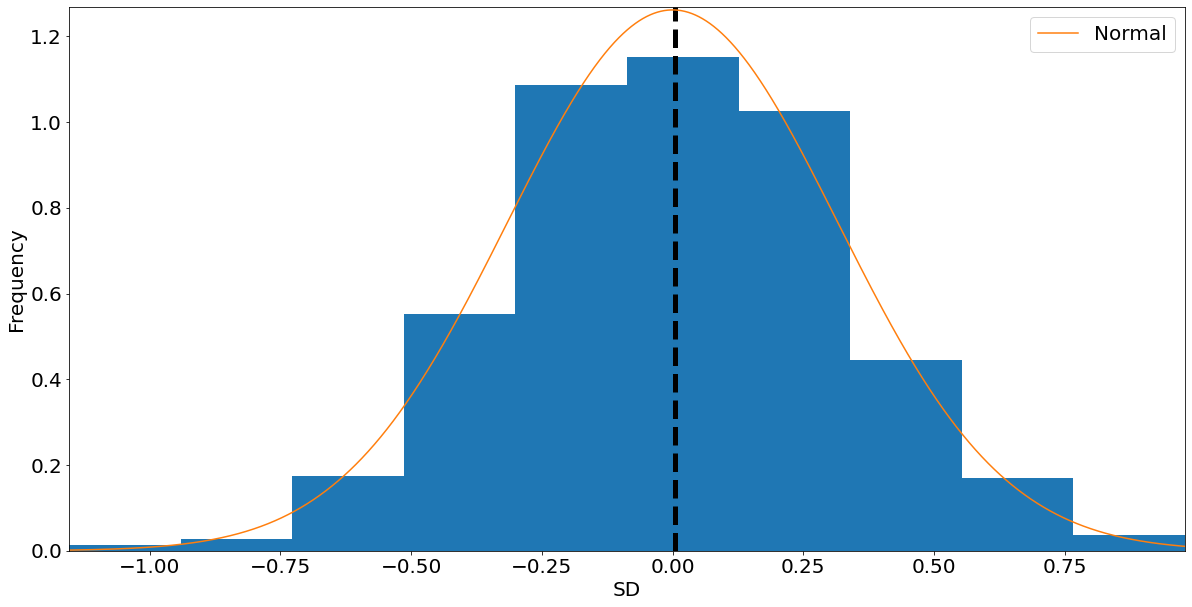

In [91]:
# np.random.seed(9)

def distribution_of_means(num_simulations = 1000, n = 100, mu = 0, SD = 1, title = None):
    # use generator to fill dictionary
    simulations = {i:stats.norm.rvs(mu, SD, size = n) for i in range(num_simulations)}
    sample_means = pd.DataFrame(simulations).mean()
    fig, ax = plt.subplots(figsize = (20,10))
    sample_means.plot.hist(bins = 10, ax = ax, density = True)
    ax.axvline(sample_means.mean(), linewidth = 5, ls = "--", color ="k")

    x_range = np.linspace(-3,3, num = 10000)
    pdf = stats.norm.pdf(x_range, 0, SD  / n ** .5)
    pdf_df = pd.DataFrame([pdf, x_range]).T.set_index(1).rename(columns={0:"Normal"})
    pdf_df.plot.line(ax = ax)
    ax.set_xlabel("SD")
    if title != None:
        plt.title(title)
    ax.set_xlim(sample_means.min(), sample_means.max())
    
distribution_of_means(n = 10, num_simulations = 1000)

According to the Central Limit Theorem, as the size of samples, $n$, approaches $\infinity$, variance of the distribution of means converges to $0$. 

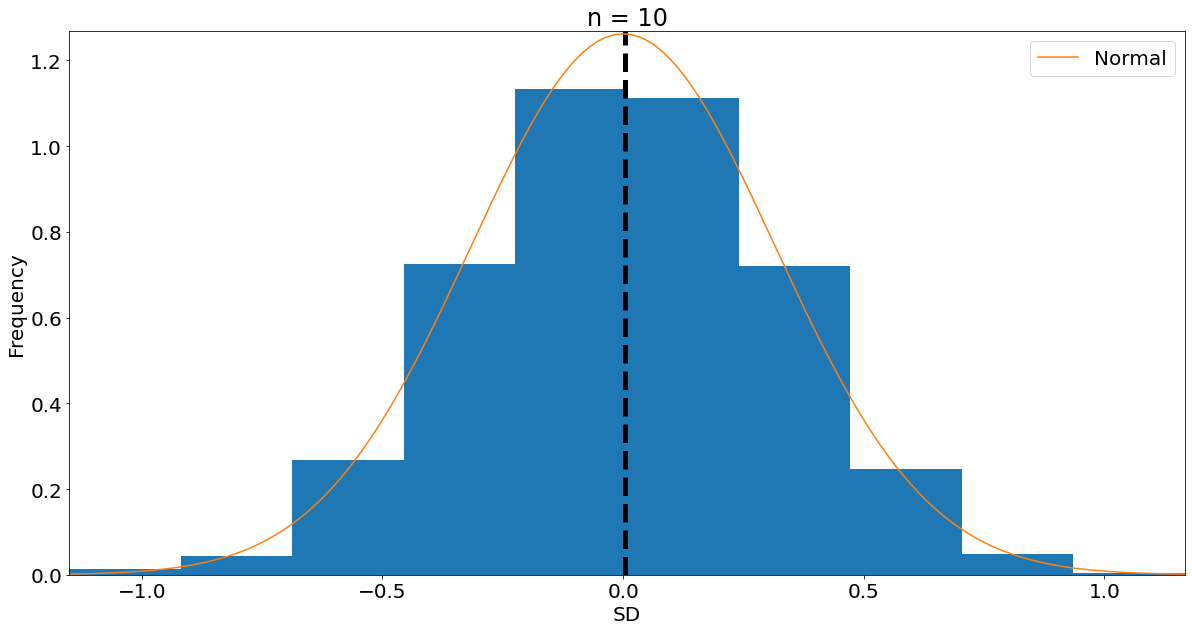

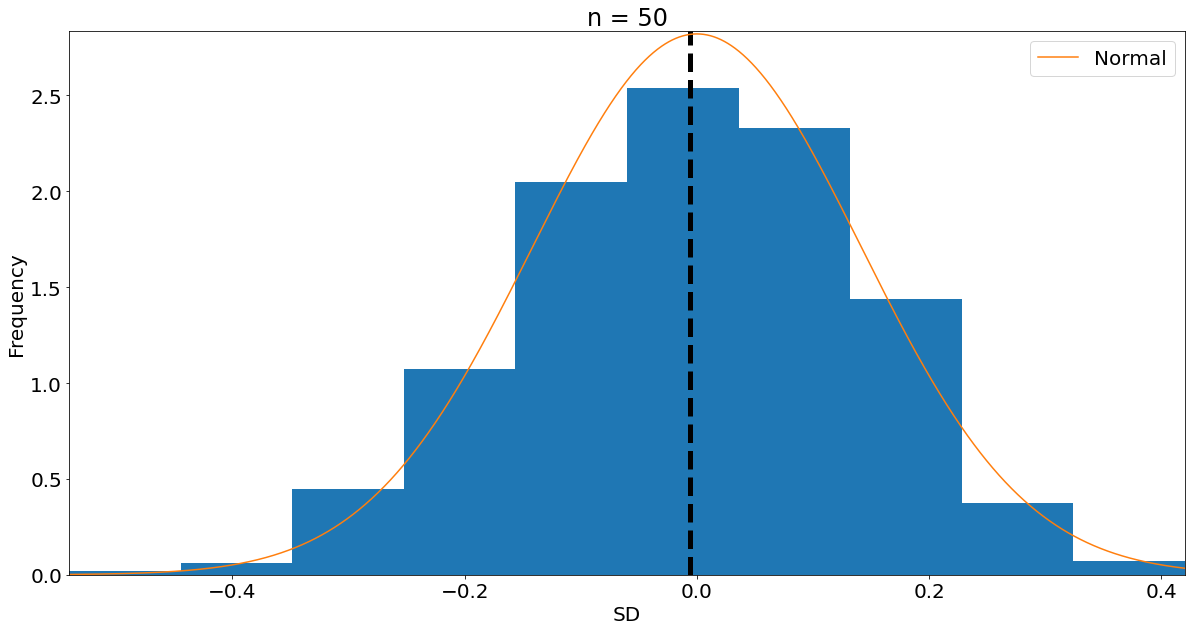

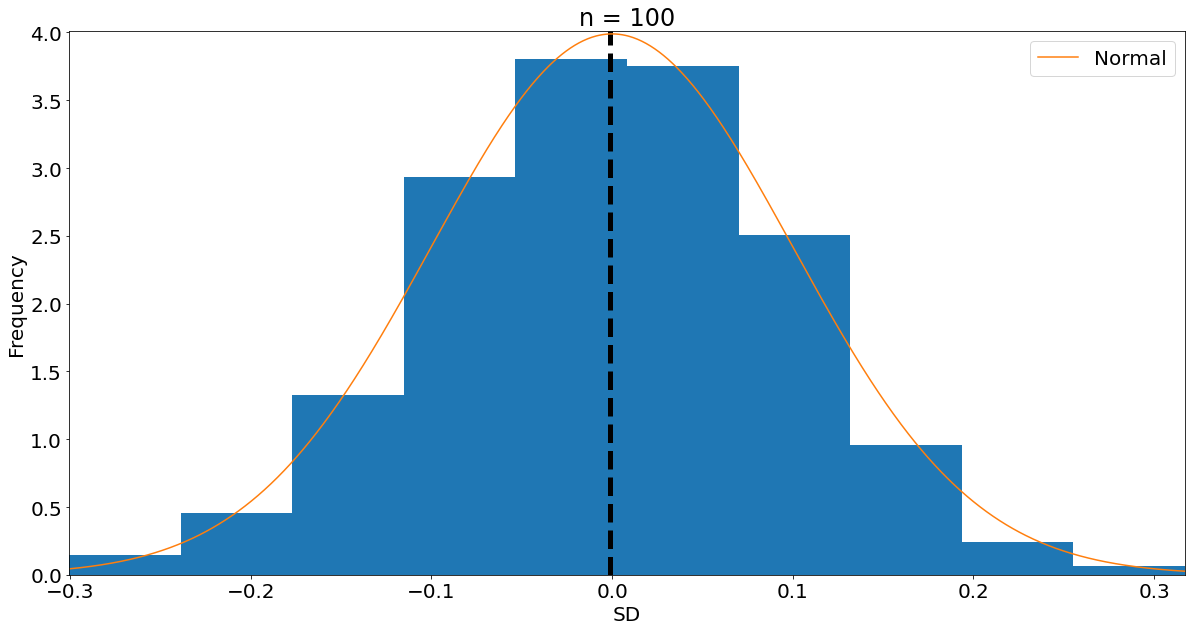

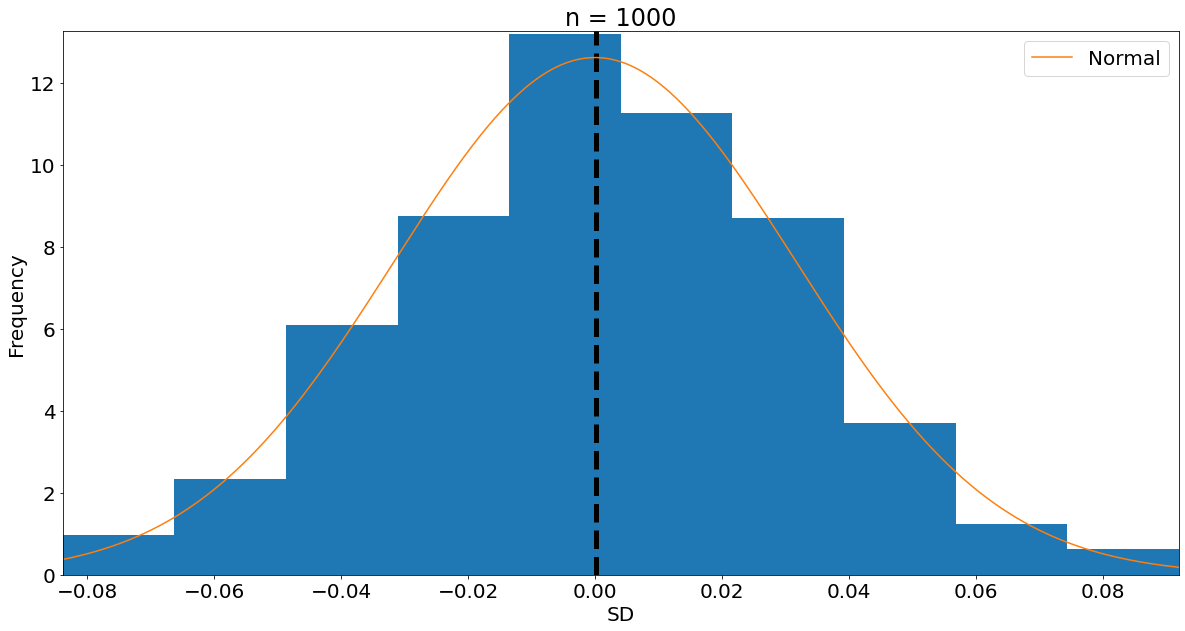

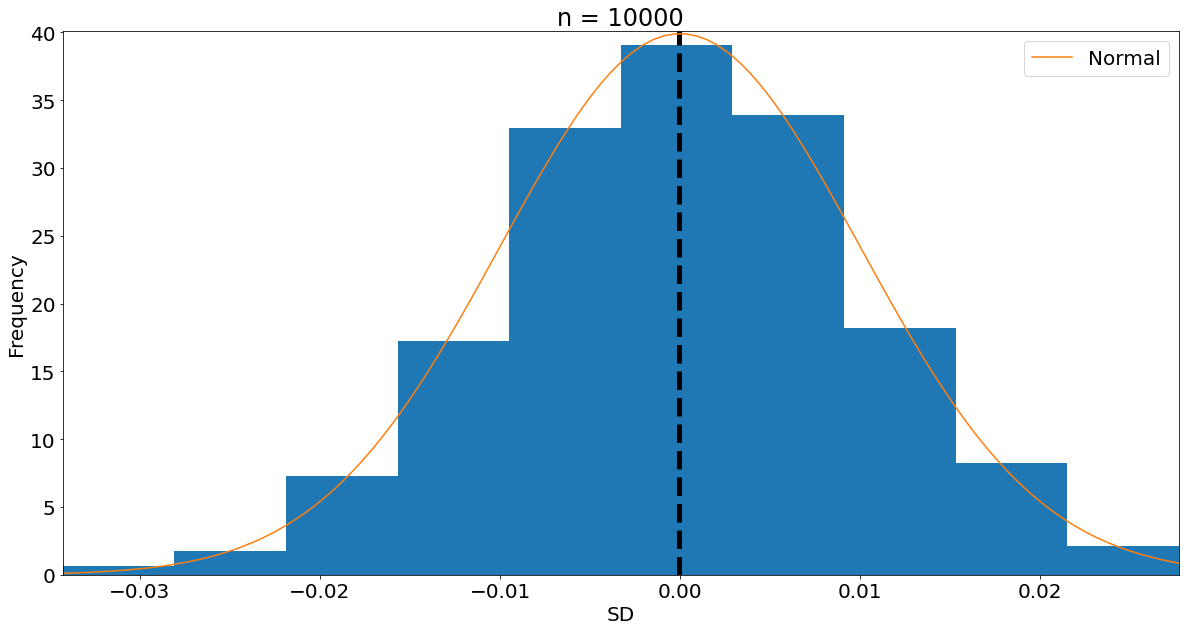

In [92]:
for n in [10,50,100,1000,10000]:
    distribution_of_means(n=n, title="n = " + str(n))

Next, we generate chi-squared distributions

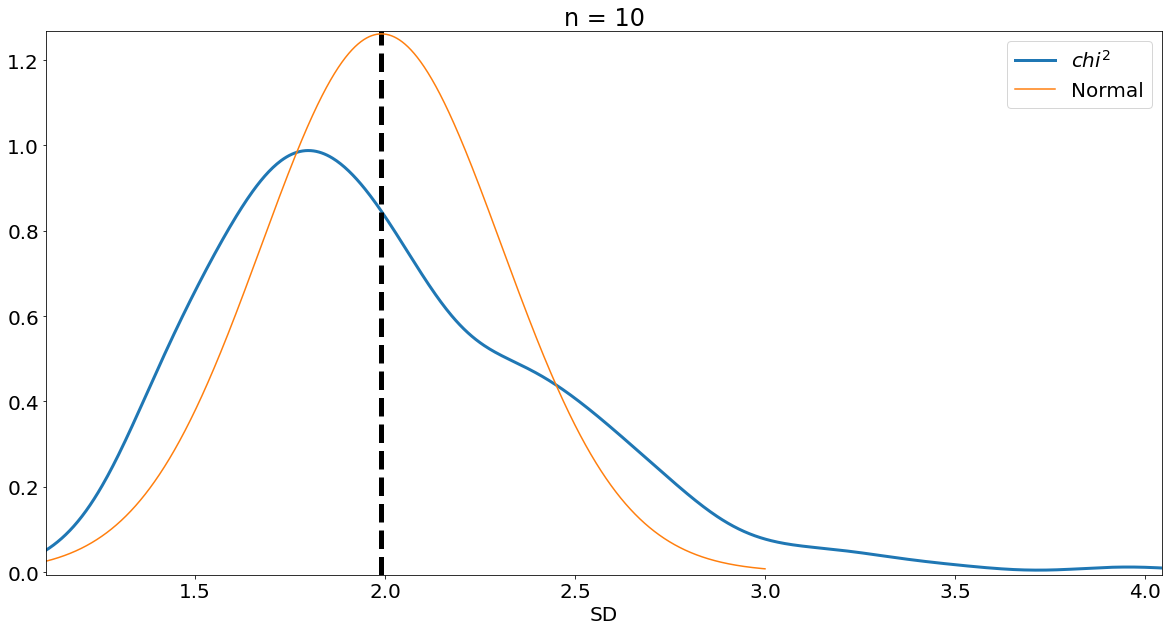

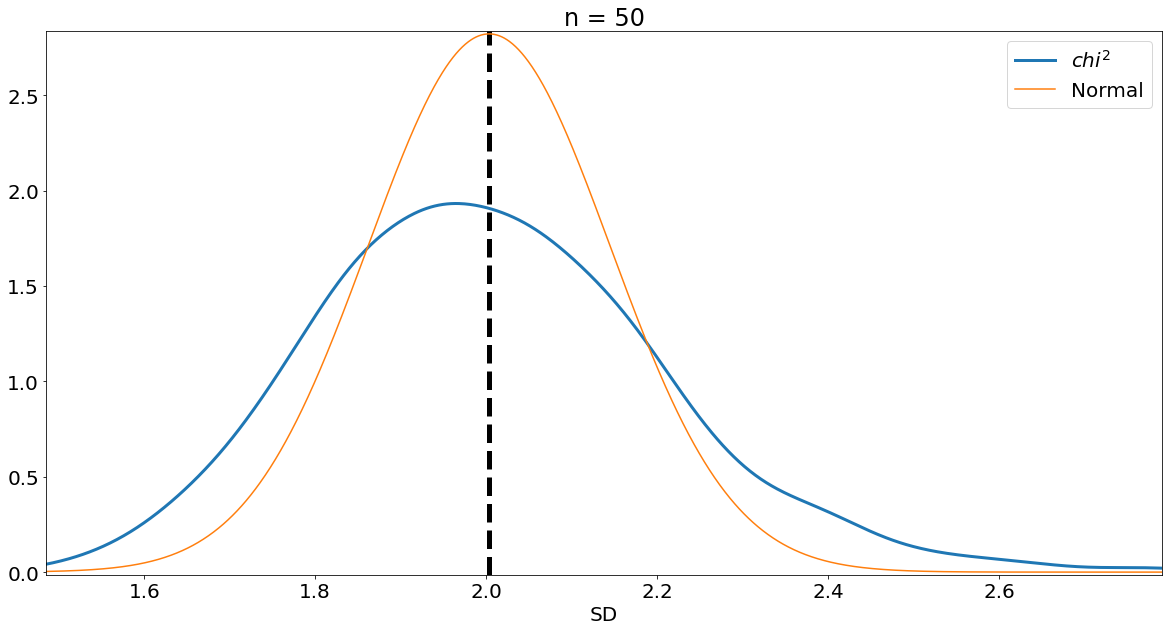

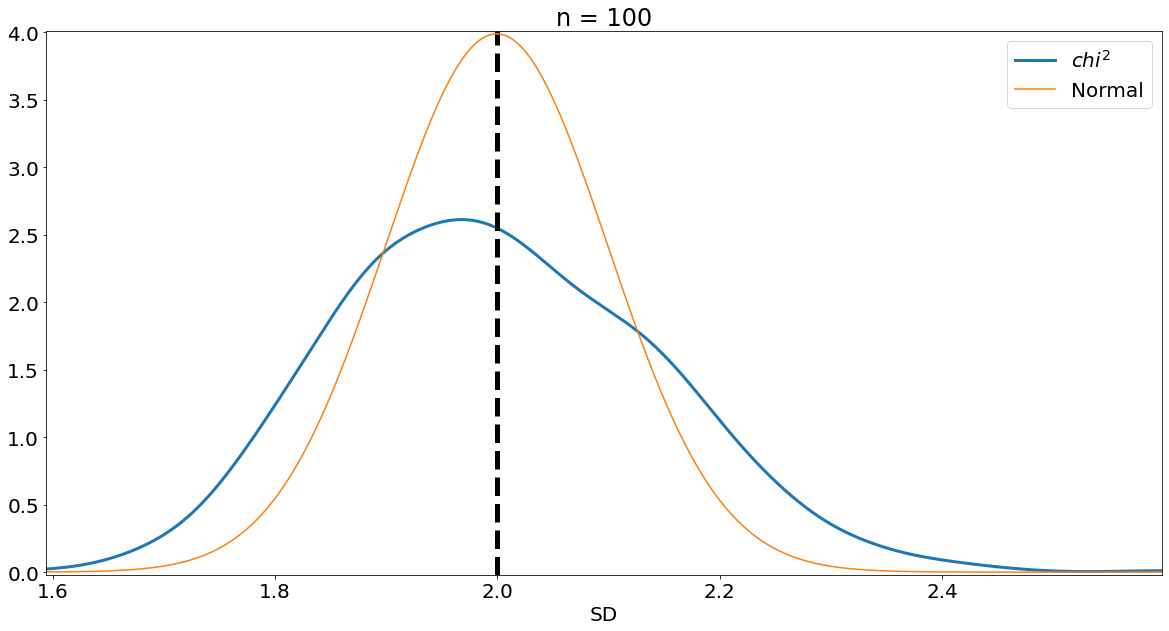

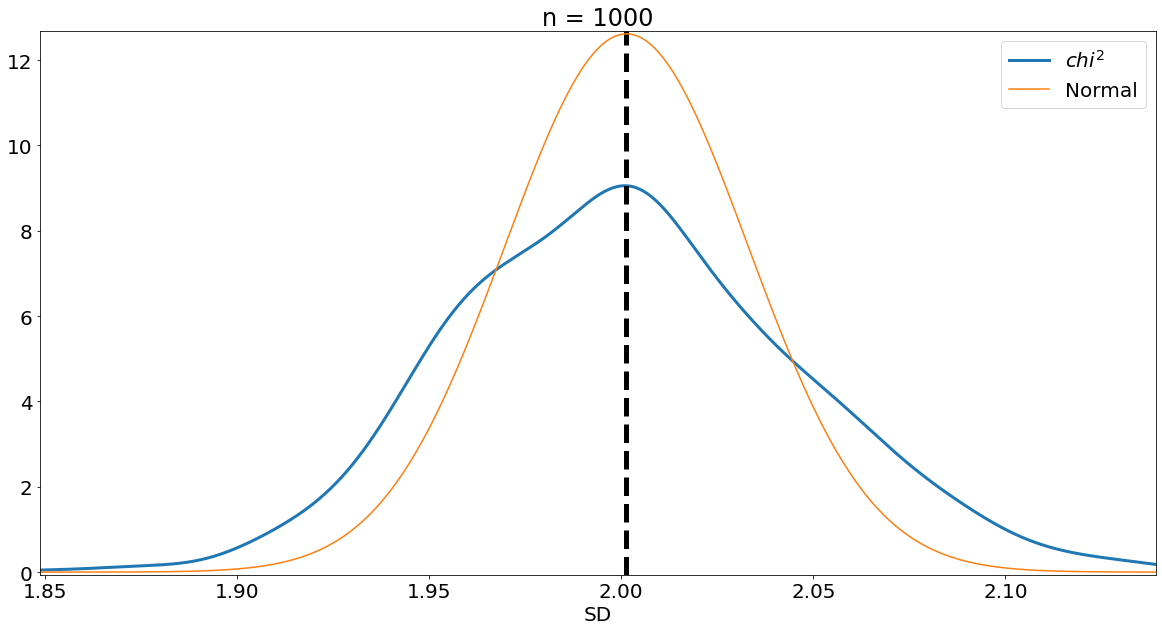

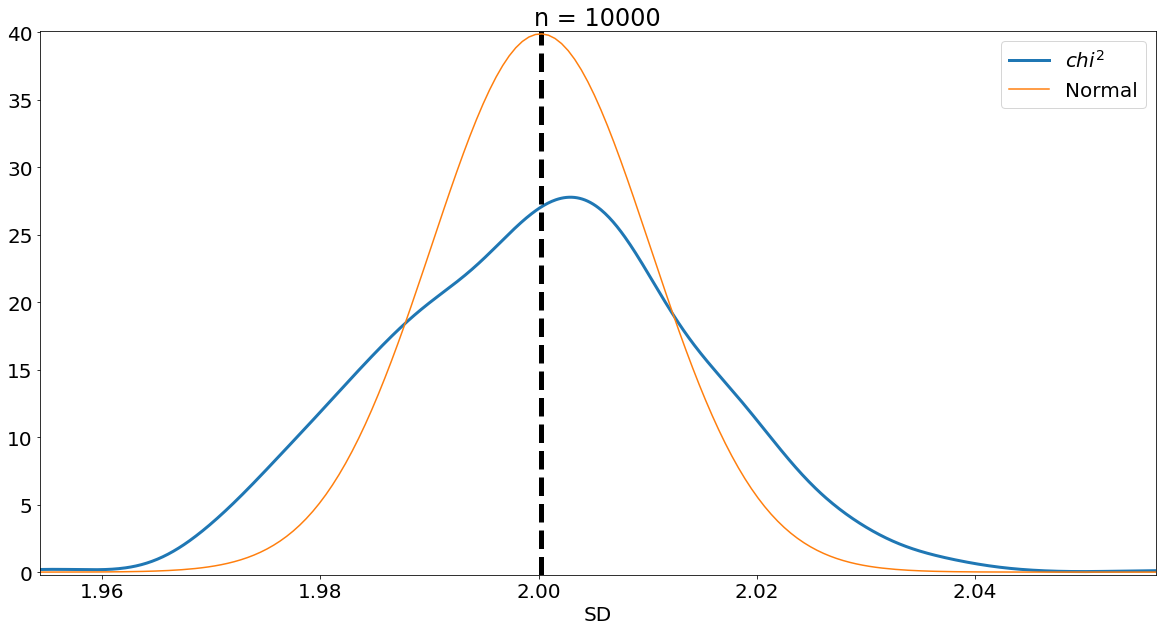

In [93]:
# np.random.seed(9)

def chi_vs_norm(num_simulations = 1000, n = 100, mu = 1, SD = 1, title = None):
    # use generator to fill dictionary
    simulations = {i:stats.chi2.rvs(mu, SD, size = n) for i in range(num_simulations)}
    sample_means = pd.DataFrame(simulations).mean()
    fig, ax = plt.subplots(figsize = (20,10))
    kde =sm.nonparametric.KDEUnivariate(sample_means)
    kde.fit()
    ax.plot(kde.support, kde.density, linewidth = 3, label = "$chi^2$")
#     sample_means.plot.hist(bins = 10, ax = ax, density = True)
    ax.axvline(sample_means.mean(), linewidth = 5, ls = "--", color ="k")

    x_range = np.linspace(-3,3, num = 10000)
    pdf = stats.norm.pdf(x_range, sample_means.mean(), SD  / n ** .5)
    pdf_df = pd.DataFrame([pdf, x_range]).T.set_index(1).rename(columns={0:"Normal"})
    pdf_df.plot.line(legend = False,ax = ax)
    ax.set_xlabel("SD")
    plt.legend()
    if title != None:
        plt.title(title)
    ax.set_xlim(sample_means.min(), sample_means.max())
    
for n in [10,50,100,1000,10000]:
    chi_vs_norm(n=n, title="n = " + str(n))

In [94]:
from matplotlib.patches import Rectangle
r = 100
n = 100
true_mu = 10
false_mu = true_mu - .25

CIlower = np.empty(r)
CIupper = np.empty(r)
pvalue1 = np.empty(r)
pvalue2 = np.empty(r)
stat_keys = ["mean", "SD", "mu = " + str(true_mu), "mu = " + str(false_mu)]
samples = {key:{} for key in stat_keys}
for j in range(r):
    sample = stats.norm.rvs(10, 2, size = n)
    samples["mean"][j] = np.mean(sample)
    samples["SD"][j] = np.std(sample, ddof=1)
    for mu in [true_mu, false_mu]:
        samples["mu = " + str(mu)][j] = {}
        dct = samples["mu = " + str(mu)][j]
        dct["t-test"] =  stats.ttest_1samp(sample, popmean = mu)
        dct["p"] = dct["t-test"].pvalue
        cv = stats.t.ppf(0.975, df = n - 1)
        dct["CILow"] = samples["mean"][j] - cv * samples["SD"][j] / np.sqrt(n)
        dct["CIHigh"] = samples["mean"][j] + cv * samples["SD"][j] / np.sqrt(n)

samples

{'mean': {0: 10.164159455367372,
  1: 10.126862643185797,
  2: 10.200045814195105,
  3: 9.95191700343674,
  4: 10.062938590846372,
  5: 9.925209702402354,
  6: 9.821640046463175,
  7: 9.892107031881297,
  8: 9.817587870527497,
  9: 10.219639616449989,
  10: 10.006900360005584,
  11: 10.155739370675915,
  12: 9.832652597286879,
  13: 10.143238415148058,
  14: 10.360689404485,
  15: 9.67208642741533,
  16: 9.80322274757192,
  17: 10.01868467486906,
  18: 9.938455861425265,
  19: 9.965889317108664,
  20: 9.848941332786694,
  21: 10.155258472167253,
  22: 9.951804935829138,
  23: 10.123553971008278,
  24: 9.682189272157544,
  25: 9.682980870193195,
  26: 10.502963498542664,
  27: 10.141199818812192,
  28: 9.830498571663805,
  29: 9.920269493047899,
  30: 10.087080408802532,
  31: 10.011792780535533,
  32: 9.90336515344131,
  33: 10.137763270309394,
  34: 10.070845806517978,
  35: 10.104110261862363,
  36: 9.893665555878188,
  37: 9.955285434511943,
  38: 9.89929060191367,
  39: 10.17678195

In [95]:
num_keys = ["p", "CILow", "CIHigh"]
true_mu_df =pd.DataFrame(samples["mu = " + str(true_mu)]).T
false_mu_df = pd.DataFrame(samples["mu = " + str(false_mu)]).T
for key in num_keys:
    true_mu_df[key] = pd.to_numeric(true_mu_df[key])
    false_mu_df[key] = pd.to_numeric(false_mu_df[key])
true_mu_df

,t-test,p,CILow,CIHigh
0,"(0.8053677583505204, 0.42253759727149753)",0.422538,9.759713,10.568606
1,"(0.6010557783282481, 0.5491765621686417)",0.549177,9.708061,10.545664
2,"(0.9702121788814357, 0.33430516999729676)",0.334305,9.790925,10.609167
3,"(-0.24501286528624505, 0.8069536200190819)",0.806954,9.562521,10.341313
4,"(0.32432595103554246, 0.7463755314450657)",0.746376,9.677882,10.447995
...,...,...,...,...
95,"(-0.8401197466590002, 0.4028656069615818)",0.402866,9.442628,10.225783
96,"(-2.7705910906242495, 0.0066835254713763625)",0.006684,9.112084,9.853152
97,"(-0.278570284310372, 0.7811556497648802)",0.781156,9.534582,10.350824
98,"(-0.3021221668217254, 0.763192727128109)",0.763193,9.517890,10.354696


In [96]:
false_mu_df

,t-test,p,CILow,CIHigh
0,"(2.031869997512118, 0.04484585921234163)",0.044846,9.759713,10.568606
1,"(1.7855174985684015, 0.07723950907505145)",0.077240,9.708061,10.545664
2,"(2.182699656793851, 0.0314222233264962)",0.031422,9.790925,10.609167
3,"(1.0288931035519222, 0.30603714397656695)",0.306037,9.562521,10.341313
4,"(1.6125894260917168, 0.11001714784316277)",0.110017,9.677882,10.447995
...,...,...,...,...
95,"(0.42668897597032523, 0.6705323233586442)",0.670532,9.442628,10.225783
96,"(-1.4318363392204696, 0.15534030114050945)",0.155340,9.112084,9.853152
97,"(0.9368887024239082, 0.35109573037476505)",0.351096,9.534582,10.350824
98,"(0.8834684593148907, 0.379123597290711)",0.379124,9.517890,10.354696


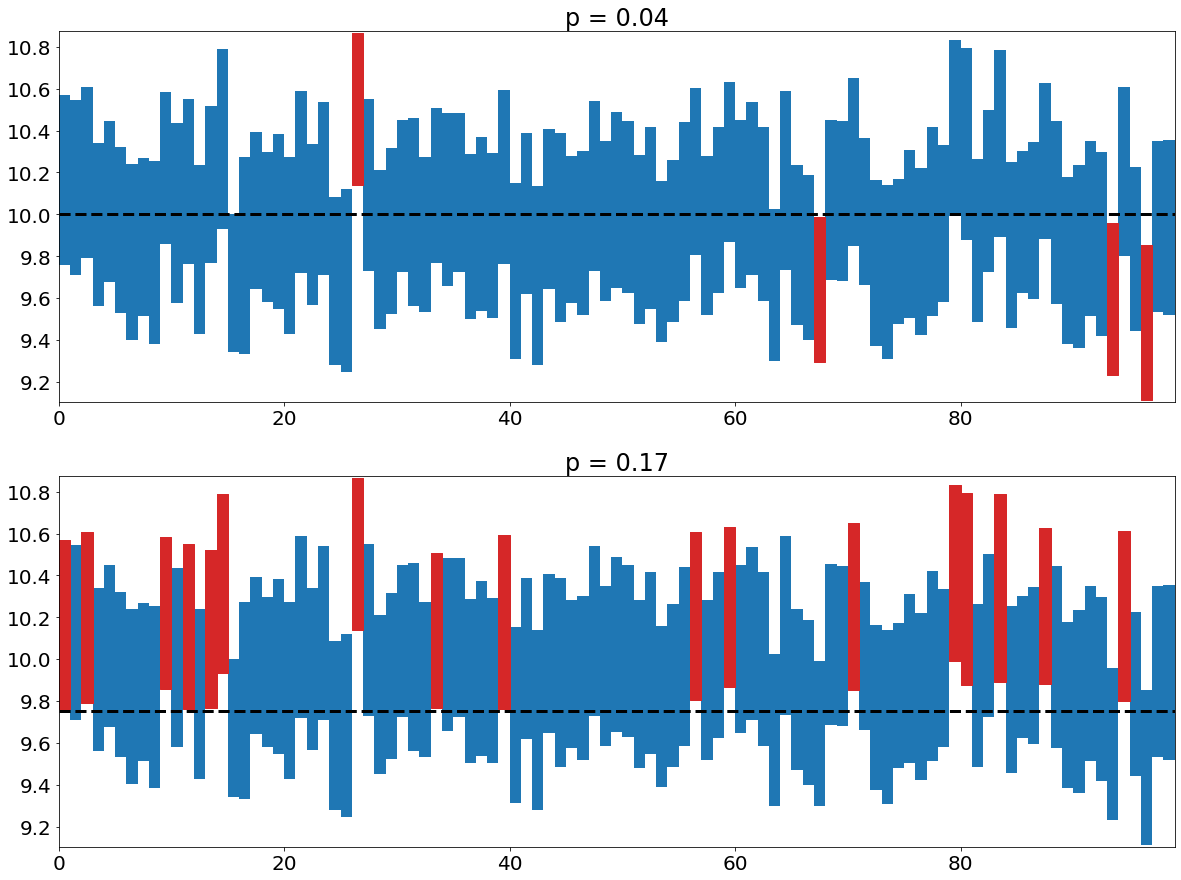

In [97]:
fig, axs = plt.subplots(2,1,figsize = (20, 15)) 
dfs = [true_mu_df, false_mu_df]
means = [true_mu, false_mu]

for i in range(2):
    df = dfs[i]
    mu = means[i]
    ax = axs[i]
    ax.fill_between(df.index, df["CILow"],df["CIHigh"], step = "post")
    ax.axhline(mu, color = "k", linewidth = 3, linestyle = "--")
    index1 = df["CILow"] > mu
    index2 = df["CIHigh"] < mu


    reject_index = np.logical_or(index1, index2)
    rejects = df[reject_index]
    for ix in rejects.index:
        ax.fill_between((ix,ix+1), rejects.loc[ix]["CILow"], rejects.loc[ix]["CIHigh"],
                   color = "C3")
    ax.set_title("p = " + str(len(rejects) / r))


In [98]:
true_mu_df

,t-test,p,CILow,CIHigh
0,"(0.8053677583505204, 0.42253759727149753)",0.422538,9.759713,10.568606
1,"(0.6010557783282481, 0.5491765621686417)",0.549177,9.708061,10.545664
2,"(0.9702121788814357, 0.33430516999729676)",0.334305,9.790925,10.609167
3,"(-0.24501286528624505, 0.8069536200190819)",0.806954,9.562521,10.341313
4,"(0.32432595103554246, 0.7463755314450657)",0.746376,9.677882,10.447995
...,...,...,...,...
95,"(-0.8401197466590002, 0.4028656069615818)",0.402866,9.442628,10.225783
96,"(-2.7705910906242495, 0.0066835254713763625)",0.006684,9.112084,9.853152
97,"(-0.278570284310372, 0.7811556497648802)",0.781156,9.534582,10.350824
98,"(-0.3021221668217254, 0.763192727128109)",0.763193,9.517890,10.354696
